# Game of War (cards) Simulation #
Simulate the game of War (card game).

Ths notebook will simulate playing the card came War.  It will play it _n_ number of times and report basic statistics at the end:  number of games played, number of hands played, number of wins by each player (would expect this to be roughly 50-50), and the number of wars waged.


Number of players:  2

Objective: Collect all of the cards in a standard deck of playing cards (excluding Jokers).

Rules:
  1.  The entire deck of cards is dealt in an alternating fashion to each player (each player receives 26 cards).
  2.  Player 1 lays a card from the top of their deck face up on the table.  Player 2 does the same.
  3.  The card with the highest value wins the "battle". The winning player collects all of the cards and sets them aside, face down.  (Cards are valued 2 - A with 2 the lowest card and ace the highest.)
  4.  This process continues until each player lays down a card of equal value.  This is a war!
  5.  Procedures for a war:
  
    a.  Each player lays down three cards face down.
    
    b.  The fourth card is dealt face up.  The card with the highest value (same as rule #3) wins the war and collects all of the cards.
    
    c.  It is possible that the fourth cards dealt could be of the same value, which incites an additional war.  In this case the process repeats (steps a and b).  The winner takes all of the cards.
    
    d.  If a player does not have enough cards to complete the war (4 cards), they lose and the other player wins by default.

  6.  When a player exhausts their deck of cards, their discard deck is played (without shuffling).


In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

games_to_play = 1000  # change this value to play more or fewer games

verbose = False  # change for more/less output
suits = ['H', 'D', 'S', 'C']
cards = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
deck = []
player1 = []
player2 = []

In [26]:
def create_deck():
    """
    Create a list representing a deck of shuffled cards.  Individual cards are represented as suit followed by value:  
      H2 = two of hearts,
      S10 = ten of spades,
      DQ = queen of diamonds,
      CA = ace of clubs, etc.
      
      Returns
      -------
      cut_deck : list - representing a shuffled deck of cards
    """
    card_deck = []
    cut_deck = []
    top_deck = []
    bottom_deck = []
    
    # create deck of cards
    for suit in suits:
        for card in cards:
            card_deck.append(suit + card)
    random.seed()        
    random.shuffle(card_deck)
    
    # cut deck
    cut_card = random.randint(0, 51)
    top_deck = card_deck[:cut_card]
    bottom_deck = card_deck[cut_card:]
    bottom_deck.extend(top_deck)
    cut_deck = bottom_deck
    
    # finish shuffle
    random.shuffle(cut_deck)
    if verbose:
        print('Shuffled deck: ', cut_deck)
        
    return cut_deck
  

def deal_cards(deck):
    """
    Deal cards to each player.
    
    Parameters
    ----------
    deck : list - representing a shuffled deck of cards
    
    Returns
    -------
    p1, p2 : list - representing hands dealt to player 1 and player 2
    """
    p1 = deck[0::2]
    p2 = deck[1::2]
    
    print('Player 1 cards: ',p1,'len=',len(p1))
    print('Player 2 cards: ',p2,'len=',len(p2))
        
    return p1, p2
    

def get_card_value(card):
    """
    Determine the value of a card for comparison purposes.  The value is determined by finding the index of the card's value
    in the cards[] list.  The suit is meaningless in War, so only the value portion of the card is used.
    
    Parameters
    ----------
    card : str - represents a card.  For example: 'SK' (king of spades), 'D3' (three of diamonds)
    
    Returns
    -------
    int - index of card value in cards[] list
    """
    return cards.index(str(card)[1:])


def check_deck(player1, player2):
    """
    Check that the deck has not grown or shrunk beyond 52 cards
    """
    return len(player1) + len(player2) == 52


def play_a_game(player1, player2):
    """
    Play a single game of War.  In a loop, each player plays thier [0] card and compares their values to determine the
    "battle" winner.  The loop continues while both players have cards (size of thier deck is greater than 0).  As soon as
    one player losses all thier cards, the game ends.
    
    If the cards played are equal, the goto_war() function is called.
    
    If player 1 wins, he collects all the played cards.  If player 2 wins, she collects all the played cards.  This
    is achieved by appending the loser's card to the end of the winner's deck.  Then, appending the winner's card the end
    of his/her own deck.  These two steps effectively put the cards in the discard pile.  Finally, the [0] card is removed
    from each player's hand.
    
    Parameters
    ----------
    player1, player2 : list - representing cards to play
    
    Returns
    -------
    hands : int - the number of "battles"
    wars : int - the number of wars waged
    player1, player2 : list - players hands at the end of the game.  One of these should have length 0 and the other 52
    """
    
    hands = 0
    wars = 0

    # play until one player does not have any cards left
    while len(player1) > 0 and len(player2) > 0:
        hands += 1
        
        # WAR!
        if get_card_value(player1[0]) == get_card_value(player2[0]):
            print('{}: [{}] {} ** WAR! ** {} [{}]'.format(hands, len(player1), player1[0], player2[0], len(player2)))
                
            _, player1, player2, wars = goto_war(player1, player2, wars)
            
        # player1 wins
        elif get_card_value(player1[0]) > get_card_value(player2[0]):
            print('{}: [{}] {} > {} [{}]'.format(hands, len(player1), player1[0], player2[0], len(player2)))
                
            # put player2 card at end of player1 deck
            player1.append(player2[0])
            # remove player2 card
            player2 = player2[1:]
            # move player1 card to end of deck
            player1.append(player1[0])
            # remove played card from top of deck
            player1 = player1[1:]
        
        # player2 wins
        else:
            print('{}: [{}] {} < {} [{}]'.format(hands, len(player1), player1[0], player2[0], len(player2)))
                
            # put player1 card at end of player2 deck
            player2.append(player1[0])
            # remove player1 card
            player1 = player1[1:]
            # move player2 card to end of deck
            player2.append(player2[0])
            # remove played card from top of deck
            player2 = player2[1:]            

        if verbose:
            print('Player 1 cards: ',player1,'len=',len(player1))
            print('Player 2 cards: ',player2,'len=',len(player2))
        
        if not check_deck(player1, player2):
            print('*** WARNING *** Incorrect deck length [{}]'.format(len(player1) + len(player2)))
            
    return hands, wars, player1, player2


def goto_war(player1, player2, wars):
    """
    Implement the war.  If any player posesses fewer than four cards they default and the other player wins.  If both
    players are able to "fight", then each player removes four cards from thier deck.  The value of the fourth card
    determines the winner of the battle.  Note this function is recursive!  It is possible to have multi-layered wars.
    
    Parameters
    ----------
    player1, player2 : list - current player decks of cards
    wars : int - number of wars fought
    
    Returns
    -------
    winner : str - the winner of the war
    player1, player2 : list - player decks after the war
    wars : int - updated number of wars fought
    
    """
    winner = ''
    wars += 1
    spoils = []
    
    # goto war
    if len(player1) > 4 and len(player2) > 4:
        
        # deal off three cards and remove from decks (includes card that started war)
        player1_war_cards = player1[0:5]
        player1 = player1[5:]
        if verbose:
            print('     Player 1 war cards: ', player1_war_cards)
            
        player2_war_cards = player2[0:5]
        player2 = player2[5:]
        if verbose:
            print('     Player 2 war cards: ', player2_war_cards)
        
        player1_war_card = player1_war_cards[4]
        player2_war_card = player2_war_cards[4]
        
        # WAR again!
        if get_card_value(player1_war_card) == get_card_value(player2_war_card):
            print('     {} ** WAR Again! ** {}'.format(player1_war_card, player2_war_card))
            
            # put card that started war back on top because that's what goto_war() expects
            player1.insert(0, player1_war_card)
            player2.insert(0, player2_war_card)
            
            # collect the spoils of the previous war.  Spoils go to the ultimate winner
            spoils.extend(player1_war_cards[:4])
            spoils.extend(player2_war_cards[:4])
            
            if verbose:
                print('     War spoils: ', spoils)
                
            winner, player1, player2, wars = goto_war(player1, player2, wars)
            
            # account for cards sacraficed in the parent war
            if winner == 'player1':
                player1.extend(spoils)
            else:
                player2.extend(spoils)
            
        # player1 wins war
        elif get_card_value(player1_war_card) > get_card_value(player2_war_card):
            print('         {} > {} - Player 1 wins WAR'.format(player1_war_card, player2_war_card))
            player1.extend(player1_war_cards)
            player1.extend(player2_war_cards)
            winner = 'player1'
        
        # player2 wins war
        else:
            print('         {} < {} - Player 2 wins WAR'.format(player1_war_card, player2_war_card))
            player2.extend(player2_war_cards)
            player2.extend(player1_war_cards)
            winner = 'player2'  
    
    # player1 wins by default
    elif len(player2) < 4:
        print('     Player 1 wins WAR by default')
        player1.extend(player2)
        player2 = []
        winner = 'player1'
        
    # player2 wins by default
    else:
        print('     Player 2 wins WAR by default')
        player2.extend(player1)    
        player1 = []
        winner = 'player2'
    
    if verbose:
        print('     Player 1 cards: ', player1, 'len=', len(player1))
        print('     Player 2 cards: ', player2, 'len=', len(player2))
        print('     War winner[{}] = {}'.format(wars, winner))
    
    return winner, player1, player2, wars


In [27]:
"""
Main processing loop
"""

# init aggregate varibles
i = 0
p1_tot = 0
p2_tot = 0
h = 0
w = 0
max_h = -1
min_h = 100
max_w = -1
min_w = 100

# open output file
f = open('war_sim.csv', 'w')
f.write('hands,wars,player1,player2\n')

# data = pd.DataFrame(columns={'hands': int(),'wars': int(),'player1': int(),'player2': int()})

while i in range(0, games_to_play):
    i += 1

    print('\n====== GAME', i, '======')
    deck = create_deck()
    player1, player2 = deal_cards(deck)
        
    # play game    
    hands, wars, player1, player2 = play_a_game(player1, player2)

    if verbose:
        print('------------------')
        
    if len(player1) > len(player2):
        print('Player 1 wins game')
        p1_tot += 1
        f.write('{},{},{},{}\n'.format(hands, wars, 1, 0))
    else:
        print('Player 2 wins game')
        p2_tot += 1
        f.write('{},{},{},{}\n'.format(hands, wars, 0, 1))
        
    print(hands, 'Hands played')
    h = h + hands
    
    if hands > max_h:
        max_h = hands
        
    if hands < min_h:
        min_h = hands
    
    print(wars, 'Wars Waged')
    w = w + wars

    if wars > max_w:
        max_w = wars
        
    if wars < min_w:
        min_w = wars
        
f.close()     
#print(data['hands'].describe())

    
print('==================')
print()
print('SUMMARY')
print('=============================')
print('Games played: ', games_to_play)
print('Player 1 wins: ', p1_tot)
print('Player 2 wins: ', p2_tot)
print('Total hands played: ', h)
print('  (min. hands:', min_h, ', max. hands:', max_h, ')')
print('Avg. hands/game: ', h/games_to_play)
print('Total wars waged: ', w)
print('  (min. wars:', min_w, ', max. wars:', max_w, ')')
print('Avg. wars/game: ', w/games_to_play)
print('=============================')

# <SDG><



====== GAME 1 ======
Player 1 cards:  ['H4', 'S10', 'CK', 'D6', 'SK', 'C4', 'S6', 'H6', 'D5', 'S7', 'D9', 'HK', 'DJ', 'D8', 'CQ', 'H8', 'D7', 'S8', 'D4', 'C6', 'C8', 'C10', 'D2', 'C7', 'DK', 'CJ'] len= 26
Player 2 cards:  ['SJ', 'H7', 'S2', 'SQ', 'HA', 'H9', 'D10', 'DA', 'H5', 'S5', 'C2', 'HJ', 'HQ', 'DQ', 'S9', 'CA', 'H10', 'S4', 'SA', 'C9', 'C3', 'S3', 'C5', 'D3', 'H3', 'H2'] len= 26
1: [26] H4 < SJ [26]
2: [25] S10 > H7 [27]
3: [26] CK > S2 [26]
4: [27] D6 < SQ [25]
5: [26] SK < HA [26]
6: [25] C4 < H9 [27]
7: [24] S6 < D10 [28]
8: [23] H6 < DA [29]
9: [22] D5 ** WAR! ** H5 [30]
         DJ < HQ - Player 2 wins WAR
10: [17] D8 < DQ [35]
11: [16] CQ > S9 [36]
12: [17] H8 < CA [35]
13: [16] D7 < H10 [36]
14: [15] S8 > S4 [37]
15: [16] D4 < SA [36]
16: [15] C6 < C9 [37]
17: [14] C8 > C3 [38]
18: [15] C10 > S3 [37]
19: [16] D2 < C5 [36]
20: [15] C7 > D3 [37]
21: [16] DK > H3 [36]
22: [17] CJ > H2 [35]
23: [18] H7 > H4 [34]
24: [19] S10 < SJ [33]
25: [18] S2 < D6 [34]
26: [17] CK > SQ [

Player 1 cards:  ['DK', 'D2', 'CA', 'D9', 'HA', 'CJ', 'SA', 'D8', 'S5', 'HK', 'DQ', 'H10', 'S6', 'HJ', 'CQ', 'C10', 'S3', 'S8', 'C7', 'S10', 'D10', 'SQ', 'D4', 'DA', 'H9', 'SK'] len= 26
Player 2 cards:  ['C2', 'DJ', 'H2', 'C4', 'SJ', 'H4', 'S4', 'C5', 'H6', 'D3', 'C9', 'CK', 'S2', 'S9', 'C8', 'D5', 'C3', 'H8', 'H5', 'HQ', 'S7', 'H3', 'H7', 'D6', 'D7', 'C6'] len= 26
1: [26] DK > C2 [26]
2: [27] D2 < DJ [25]
3: [26] CA > H2 [26]
4: [27] D9 > C4 [25]
5: [28] HA > SJ [24]
6: [29] CJ > H4 [23]
7: [30] SA > S4 [22]
8: [31] D8 > C5 [21]
9: [32] S5 < H6 [20]
10: [31] HK > D3 [21]
11: [32] DQ > C9 [20]
12: [33] H10 < CK [19]
13: [32] S6 > S2 [20]
14: [33] HJ > S9 [19]
15: [34] CQ > C8 [18]
16: [35] C10 > D5 [17]
17: [36] S3 ** WAR! ** C3 [16]
         D10 > S7 - Player 1 wins WAR
18: [41] SQ > H3 [11]
19: [42] D4 < H7 [10]
20: [41] DA > D6 [11]
21: [42] H9 > D7 [10]
22: [43] SK > C6 [9]
23: [44] C2 ** WAR! ** D2 [8]
         C4 < H10 - Player 2 wins WAR
24: [39] D9 < CK [13]
25: [38] SJ > D4 [1

293: [12] D8 ** WAR! ** H8 [40]
         CJ > C5 - Player 1 wins WAR
294: [17] SQ ** WAR! ** HQ [35]
         HJ < HK - Player 2 wins WAR
295: [12] D4 > D2 [40]
296: [13] H5 < S6 [39]
297: [12] D8 ** WAR! ** S8 [40]
         CJ > H9 - Player 1 wins WAR
298: [17] H8 < DK [35]
299: [16] CK > D3 [36]
300: [17] S4 < H6 [35]
301: [16] D5 < S10 [36]
302: [15] C5 < D7 [37]
303: [14] D2 < C8 [38]
304: [13] D4 > C2 [39]
305: [14] D8 < DQ [38]
306: [13] S9 < SK [39]
307: [12] S2 < D10 [40]
308: [11] DJ < DA [41]
309: [10] CJ > H4 [42]
310: [11] S8 > H7 [41]
311: [12] CQ > H3 [40]
312: [13] C6 < SA [39]
313: [12] S7 < C9 [40]
314: [11] H9 < HA [41]
315: [10] D3 > H2 [42]
316: [11] CK > D9 [41]
317: [12] C2 < S5 [40]
318: [11] D4 < H10 [41]
319: [10] H4 < D6 [42]
320: [9] CJ ** WAR! ** SJ [43]
         CQ > S3 - Player 1 wins WAR
321: [14] H2 < HK [38]
322: [13] D3 < SQ [39]
323: [12] D9 > C3 [40]
324: [13] CK > C10 [39]
325: [14] CJ > C4 [38]
326: [15] H7 < HJ [37]
327: [14] S8 > H5 [38]
328: [15

431: [46] H8 > H6 [6]
432: [47] SK > S10 [5]
433: [48] SJ > D7 [4]
434: [49] HQ < HA [3]
435: [48] C6 > S2 [4]
436: [49] H3 < D5 [3]
437: [48] S9 < HQ [4]
438: [47] S4 < HA [5]
439: [46] CQ > H3 [6]
440: [47] D6 > D5 [5]
441: [48] CK > S9 [4]
442: [49] D2 < HQ [3]
443: [48] CJ > S4 [4]
444: [49] S8 < HA [3]
445: [48] DK > D2 [4]
446: [49] SA > HQ [3]
447: [50] C4 < S8 [2]
448: [49] S7 < HA [3]
449: [48] H7 > C4 [4]
450: [49] HK > S8 [3]
451: [50] DA > S7 [2]
452: [51] C2 < HA [1]
453: [50] D3 > C2 [2]
454: [51] D4 < HA [1]
455: [50] C5 > D4 [2]
456: [51] C9 < HA [1]
457: [50] H2 < C9 [2]
458: [49] H9 < HA [3]
459: [48] C3 > H2 [4]
460: [49] SQ > C9 [3]
461: [50] H10 > H9 [2]
462: [51] HJ < HA [1]
463: [50] S6 < HJ [2]
464: [49] C8 < HA [3]
465: [48] C7 > S6 [4]
466: [49] D10 < HJ [3]
467: [48] DJ > C8 [4]
468: [49] D8 < HA [3]
469: [48] D9 < D10 [4]
470: [47] S3 < HJ [5]
471: [46] DQ > D8 [6]
472: [47] CA ** WAR! ** HA [5]
         C10 < HJ - Player 2 wins WAR
473: [42] H6 < HA [10]
47

37: [32] D10 > H4 [20]
38: [33] HA > D7 [19]
39: [34] D4 > D2 [18]
40: [35] S7 < H10 [17]
41: [34] S5 < C10 [18]
42: [33] CQ > DJ [19]
43: [34] H3 < S4 [18]
44: [33] CJ > D6 [19]
45: [34] H6 > C3 [18]
46: [35] C7 > H5 [17]
47: [36] S6 ** WAR! ** C6 [16]
         S9 < DQ - Player 2 wins WAR
48: [31] C4 < SK [21]
49: [30] C5 < C8 [22]
50: [29] S10 < SA [23]
51: [28] HQ > H7 [24]
52: [29] H9 < HJ [23]
53: [28] H2 < S7 [24]
54: [27] D5 < H10 [25]
55: [26] C2 < S5 [26]
56: [25] D3 < C10 [27]
57: [24] S8 > H3 [28]
58: [25] CK > S4 [27]
59: [26] S2 < C6 [26]
60: [25] S3 < SJ [27]
61: [24] H8 < C9 [28]
62: [23] DA > SQ [29]
63: [24] D9 < DQ [28]
64: [23] DK > S6 [29]
65: [24] H4 < HK [28]
66: [23] D10 > D8 [29]
67: [24] D7 < CA [28]
68: [23] HA > S9 [29]
69: [24] D2 < C4 [28]
70: [23] D4 < SK [29]
71: [22] DJ > C5 [30]
72: [23] CQ > C8 [29]
73: [24] D6 < S10 [28]
74: [23] CJ < SA [29]
75: [22] C3 < H9 [30]
76: [21] H6 < HJ [31]
77: [20] H5 > H2 [32]
78: [21] C7 ** WAR! ** S7 [31]
         S8 >

====== GAME 51 ======
Player 1 cards:  ['H6', 'D4', 'DQ', 'S2', 'S9', 'DJ', 'C6', 'H9', 'H7', 'CQ', 'CA', 'S4', 'SJ', 'C3', 'S7', 'D6', 'D3', 'H8', 'SQ', 'HJ', 'H10', 'D10', 'C9', 'C5', 'D7', 'S8'] len= 26
Player 2 cards:  ['DA', 'CK', 'H4', 'SK', 'C4', 'D5', 'H5', 'SA', 'D2', 'C10', 'C8', 'S10', 'S6', 'C2', 'H3', 'S5', 'HQ', 'CJ', 'H2', 'C7', 'D8', 'HA', 'DK', 'HK', 'S3', 'D9'] len= 26
1: [26] H6 < DA [26]
2: [25] D4 < CK [27]
3: [24] DQ > H4 [28]
4: [25] S2 < SK [27]
5: [24] S9 > C4 [28]
6: [25] DJ > D5 [27]
7: [26] C6 > H5 [26]
8: [27] H9 < SA [25]
9: [26] H7 > D2 [26]
10: [27] CQ > C10 [25]
11: [28] CA > C8 [24]
12: [29] S4 < S10 [23]
13: [28] SJ > S6 [24]
14: [29] C3 > C2 [23]
15: [30] S7 > H3 [22]
16: [31] D6 > S5 [21]
17: [32] D3 < HQ [20]
18: [31] H8 < CJ [21]
19: [30] SQ > H2 [22]
20: [31] HJ > C7 [21]
21: [32] H10 > D8 [20]
22: [33] D10 < HA [19]
23: [32] C9 < DK [20]
24: [31] C5 < HK [21]
25: [30] D7 > S3 [22]
26: [31] S8 < D9 [21]
27: [30] H4 < H6 [22]
28: [29] DQ < DA [23]

111: [32] C2 < H6 [20]
112: [31] H5 < HK [21]
113: [30] S4 < H8 [22]
114: [29] S6 < CA [23]
115: [28] S5 < D8 [24]
116: [27] C10 > D9 [25]
117: [28] S10 > C9 [24]
118: [29] SJ > D10 [23]
119: [30] C3 < HJ [22]
120: [29] D6 < CK [23]
121: [28] D5 > D3 [24]
122: [29] S7 < HA [23]
123: [28] SQ > D2 [24]
124: [29] S3 ** WAR! ** H3 [23]
         D4 < CJ - Player 2 wins WAR
125: [24] DJ > D7 [28]
126: [25] SK < DA [27]
127: [24] H2 ** WAR! ** C2 [28]
         S2 < S4 - Player 2 wins WAR
128: [19] C7 < H8 [33]
129: [18] H4 < S6 [34]
130: [17] HQ < CA [35]
131: [16] C5 ** WAR! ** S5 [36]
         D9 > D6 - Player 1 wins WAR
132: [21] C10 < CK [31]
133: [20] C9 > S7 [32]
134: [21] S10 < HA [31]
135: [20] D10 > H3 [32]
136: [21] SJ > C6 [31]
137: [22] D3 < DQ [30]
138: [21] D5 > C4 [31]
139: [22] D2 < CJ [30]
140: [21] SQ > S3 [31]
141: [22] D7 < H10 [30]
142: [21] DJ > H7 [31]
143: [22] C5 < CQ [30]
144: [21] S8 > D4 [31]
145: [22] S9 < SK [30]
146: [21] DK < DA [31]
147: [20] D9 > C2 [32]
148:

194: [45] C7 < S8 [7]
195: [44] SK > CJ [8]
196: [45] SQ < HK [7]
197: [44] CA > S2 [8]
198: [45] CK > S6 [7]
199: [46] D2 < D3 [6]
200: [45] C8 < S10 [7]
201: [44] D7 ** WAR! ** C7 [8]
         H8 > D2 - Player 1 wins WAR
202: [49] S9 > D3 [3]
203: [50] H2 < C8 [2]
204: [49] DJ > S10 [3]
205: [50] C5 > H2 [2]
206: [51] HQ > C8 [1]
Player 1 wins game
206 Hands played
14 Wars Waged

====== GAME 74 ======
Player 1 cards:  ['H5', 'D4', 'H6', 'HJ', 'SA', 'D9', 'H3', 'HK', 'S4', 'C10', 'CQ', 'SK', 'S2', 'H7', 'D6', 'D10', 'CK', 'S8', 'C7', 'DJ', 'CA', 'S9', 'HA', 'C8', 'S5', 'D2'] len= 26
Player 2 cards:  ['C3', 'D8', 'C5', 'H8', 'DA', 'S6', 'S10', 'D5', 'CJ', 'C2', 'SQ', 'DQ', 'HQ', 'SJ', 'C9', 'S3', 'DK', 'H10', 'H4', 'S7', 'H2', 'D3', 'C6', 'D7', 'C4', 'H9'] len= 26
1: [26] H5 > C3 [26]
2: [27] D4 < D8 [25]
3: [26] H6 > C5 [26]
4: [27] HJ > H8 [25]
5: [28] SA ** WAR! ** DA [24]
         S4 < CJ - Player 2 wins WAR
6: [23] C10 > C2 [29]
7: [24] CQ ** WAR! ** SQ [28]
         D6 < C9 - Pla

26: [19] H3 < D6 [33]
27: [18] D10 > S3 [34]
28: [19] CK > C7 [33]
29: [20] S5 > H2 [32]
30: [21] DA > HQ [31]
31: [22] C8 > D5 [30]
32: [23] CJ > D8 [29]
33: [24] C4 < D7 [28]
34: [23] H10 > S8 [29]
35: [24] S6 > C2 [28]
36: [25] D9 < SJ [27]
37: [24] C5 < H6 [28]
38: [23] C9 > H7 [29]
39: [24] D2 < CQ [28]
40: [23] DQ < HA [29]
41: [22] C3 < H5 [30]
42: [21] D4 < H8 [31]
43: [20] S4 < C6 [32]
44: [19] HK > S9 [33]
45: [20] S3 ** WAR! ** D3 [32]
         H2 < S7 - Player 2 wins WAR
46: [15] S5 < SA [37]
47: [14] HQ > S10 [38]
48: [15] DA > HJ [37]
49: [16] D5 > H4 [36]
50: [17] C8 < SQ [35]
51: [16] D8 < DJ [36]
52: [15] CJ < DK [37]
53: [14] S8 < C10 [38]
54: [13] H10 < SK [39]
55: [12] C2 < H3 [40]
56: [11] S6 ** WAR! ** D6 [41]
         HK > SJ - Player 1 wins WAR
57: [16] S10 > C5 [36]
58: [17] HQ > H6 [35]
59: [18] HJ > D2 [34]
60: [19] DA > CQ [33]
61: [20] H4 < DQ [32]
62: [19] D5 < HA [33]
63: [18] S6 > C3 [34]
64: [19] H7 > H5 [33]
65: [20] C9 > D4 [32]
66: [21] S9 > H8 [31]


133: [28] D5 < C9 [24]
134: [27] CQ > C8 [25]
135: [28] S8 < HQ [24]
136: [27] C10 > H3 [25]
137: [28] SQ > H9 [24]
138: [29] CK > H4 [23]
139: [30] S4 < H5 [22]
140: [29] H6 > H2 [23]
141: [30] SJ > S5 [22]
142: [31] DQ < HA [21]
143: [30] S10 > S3 [22]
144: [31] DK > D8 [21]
145: [32] C6 < S7 [20]
146: [31] H7 < HK [21]
147: [30] D4 > C2 [22]
148: [31] C5 < D9 [21]
149: [30] H8 > S6 [22]
150: [31] SA > DJ [21]
151: [32] H10 > D6 [20]
152: [33] S9 < DA [19]
153: [32] CA > D2 [20]
154: [33] C3 < C7 [19]
155: [32] HJ > S2 [20]
156: [33] D10 > D7 [19]
157: [34] CJ > D5 [18]
158: [35] SK > C9 [17]
159: [36] D3 < S8 [16]
160: [35] C4 < HQ [17]
161: [34] C8 > S4 [18]
162: [35] CQ > H5 [17]
163: [36] H3 < DQ [16]
164: [35] C10 < HA [17]
165: [34] H9 > C6 [18]
166: [35] SQ > S7 [17]
167: [36] H4 < H7 [16]
168: [35] CK ** WAR! ** HK [17]
         SJ < DA - Player 2 wins WAR
169: [30] S3 ** WAR! ** C3 [22]
         C2 < C4 - Player 2 wins WAR
170: [25] D4 < HQ [27]
171: [24] S6 > H3 [28]
172: [

1150: [17] S9 ** WAR! ** D9 [35]
         C5 > H4 - Player 1 wins WAR
1151: [22] D5 < S8 [30]
1152: [21] H6 > D4 [31]
1153: [22] S5 < DA [30]
1154: [21] C8 > C2 [31]
1155: [22] H2 < C7 [30]
1156: [21] D10 > S3 [31]
1157: [22] C10 > S7 [30]
1158: [23] CK > CJ [29]
1159: [24] DJ > D2 [28]
1160: [25] SQ ** WAR! ** CQ [27]
         SJ < DQ - Player 2 wins WAR
1161: [20] DK > C6 [32]
1162: [21] S2 < H8 [31]
1163: [20] C5 > H3 [32]
1164: [21] D9 < H10 [31]
1165: [20] H5 > S4 [32]
1166: [21] H7 ** WAR! ** D7 [31]
         H6 < C9 - Player 2 wins WAR
1167: [16] C2 < HK [36]
1168: [15] C8 < SA [37]
1169: [14] S3 ** WAR! ** C3 [38]
         CJ > D5 - Player 1 wins WAR
1170: [19] CK > S8 [33]
1171: [20] D2 < S5 [32]
1172: [19] DJ < DA [33]
1173: [18] C6 > H2 [34]
1174: [19] DK > C7 [33]
1175: [20] H3 < CQ [32]
1176: [19] C5 > C4 [33]
1177: [20] S4 < HA [32]
1178: [19] H5 < S10 [33]
1179: [18] S3 < DQ [34]
1180: [17] D10 < SQ [35]
1181: [16] S7 < HJ [36]
1182: [15] C10 < SK [37]
1183: [14] CJ > S9

191: [30] D7 < D9 [22]
192: [29] D4 < HA [23]
193: [28] S7 > C2 [24]
194: [29] SQ > C8 [23]
195: [30] H10 > S4 [22]
196: [31] CA > C10 [21]
197: [32] H3 < D6 [20]
198: [31] D5 < SJ [21]
199: [30] C4 > H2 [22]
200: [31] H9 < HK [21]
201: [30] H8 > C7 [22]
202: [31] CQ < DK [21]
203: [30] H4 < DJ [22]
204: [29] C6 < SA [23]
205: [28] H6 > D2 [24]
206: [29] S8 > S6 [23]
207: [30] S3 ** WAR! ** C3 [22]
         S9 > S5 - Player 1 wins WAR
208: [35] SK < DA [17]
209: [34] D3 < D7 [18]
210: [33] D8 < D9 [19]
211: [32] H5 > D4 [20]
212: [33] HQ < HA [19]
213: [32] S2 < H3 [20]
214: [31] C5 < D6 [21]
215: [30] S10 > D5 [22]
216: [31] DQ > SJ [21]
217: [32] C2 < H9 [20]
218: [31] S7 < HK [21]
219: [30] C8 < CQ [22]
220: [29] SQ < DK [23]
221: [28] S4 ** WAR! ** H4 [24]
         H2 < SK - Player 2 wins WAR
222: [23] C4 < DA [29]
223: [22] C7 > D3 [30]
224: [23] H8 > D7 [29]
225: [24] D2 < D8 [28]
226: [23] H6 < D9 [29]
227: [22] S6 < HQ [30]
228: [21] S8 < HA [31]
229: [20] S3 > S2 [32]
230: [21

7: [24] SA > C6 [28]
8: [25] C5 < CQ [27]
9: [24] SJ < SQ [28]
10: [23] S2 < H10 [29]
11: [22] H3 ** WAR! ** D3 [30]
         HA > DK - Player 1 wins WAR
12: [27] H2 < HQ [25]
13: [26] D9 > H4 [26]
14: [27] DA > D2 [25]
15: [28] S4 > C3 [24]
16: [29] C8 < S9 [23]
17: [28] C2 < D7 [24]
18: [27] SK > HJ [25]
19: [28] H6 < D8 [24]
20: [27] D10 < DJ [25]
21: [26] C4 < H5 [26]
22: [25] H7 > D5 [27]
23: [26] H8 > D6 [26]
24: [27] CJ > S10 [25]
25: [28] S8 < CA [24]
26: [27] DQ > S5 [25]
27: [28] C6 < C9 [24]
28: [27] SA > CK [25]
29: [28] H3 < H9 [24]
30: [27] HK > S3 [25]
31: [28] S6 > C5 [24]
32: [29] D4 < CQ [23]
33: [28] HA > SJ [24]
34: [29] D3 < SQ [23]
35: [28] S7 > S2 [24]
36: [29] C7 < H10 [23]
37: [28] C10 > H2 [24]
38: [29] DK > HQ [23]
39: [30] H4 < C8 [22]
40: [29] D9 ** WAR! ** S9 [23]
         S4 < D8 - Player 2 wins WAR
41: [24] HJ > D10 [28]
42: [25] SK > DJ [27]
43: [26] D5 > C4 [26]
44: [27] H7 > H5 [25]
45: [28] D6 < S8 [24]
46: [27] H8 < CA [25]
47: [26] S10 > C6 [26]
48

487: [32] S9 > H5 [20]
488: [33] SK ** WAR! ** HK [19]
         D6 < DK - Player 2 wins WAR
489: [28] H8 < D10 [24]
490: [27] CJ > S4 [25]
491: [28] H9 > C7 [24]
492: [29] DA > S7 [23]
493: [30] S3 < S10 [22]
494: [29] D4 < C8 [23]
495: [28] H6 < DJ [24]
496: [27] HJ < CA [25]
497: [26] D9 > S5 [26]
498: [27] SA > C9 [25]
499: [28] D2 < SJ [24]
500: [27] S8 < SQ [25]
501: [26] S2 < C10 [26]
502: [25] S6 < CQ [27]
503: [24] H2 < HK [28]
504: [23] D8 > H4 [29]
505: [24] C2 < HA [28]
506: [23] H10 > H7 [29]
507: [24] C3 < DK [28]
508: [23] CK ** WAR! ** SK [29]
         DQ > D6 - Player 1 wins WAR
509: [28] H3 < H8 [24]
510: [27] C6 < D10 [25]
511: [26] H5 > S3 [26]
512: [27] S9 < S10 [25]
513: [26] S4 ** WAR! ** D4 [26]
         S7 < HJ - Player 2 wins WAR
514: [21] DA ** WAR! ** CA [31]
         SA > SQ - Player 1 wins WAR
515: [26] H4 > S2 [26]
516: [27] D8 < C10 [25]
517: [26] H7 > S6 [26]
518: [27] H10 < CQ [25]
519: [26] CK > H2 [26]
520: [27] C4 < HK [25]
521: [26] D7 > C2 [26]
522

100: [21] HJ < CK [31]
101: [20] HA > H2 [32]
102: [21] C9 > H5 [31]
103: [22] C4 < H6 [30]
104: [21] CJ > H9 [31]
105: [22] H4 < H10 [30]
106: [21] C10 < SK [31]
107: [20] C2 < H3 [32]
108: [19] DJ > H7 [33]
109: [20] D5 > D3 [32]
110: [21] H8 < SQ [31]
111: [20] S10 > S5 [32]
112: [21] DK > SJ [31]
113: [22] C5 < C6 [30]
114: [21] D7 < HK [31]
115: [20] D2 < C3 [32]
116: [19] C8 < CQ [33]
117: [18] S3 < S9 [34]
118: [17] D9 < SA [35]
119: [16] S8 < DA [36]
120: [15] DQ > S4 [37]
121: [16] H2 < D6 [36]
122: [15] HA > S7 [37]
123: [16] H5 < D10 [36]
124: [15] C9 < CA [37]
125: [14] H9 > D4 [38]
126: [15] CJ > D8 [37]
127: [16] H7 > S2 [36]
128: [17] DJ > C7 [35]
129: [18] D3 < S6 [34]
130: [17] D5 < HQ [35]
131: [16] S5 < HJ [36]
132: [15] S10 < CK [37]
133: [14] SJ > C4 [38]
134: [15] DK > H6 [37]
135: [16] S4 ** WAR! ** H4 [36]
         D4 > C2 - Player 1 wins WAR
136: [21] H9 > H3 [31]
137: [22] D8 ** WAR! ** H8 [30]
     C7 ** WAR Again! ** D7
         H6 < C8 - Player 2 wins WAR
1

85: [50] H7 < H8 [2]
86: [49] S2 < HQ [3]
87: [48] H6 < H7 [4]
88: [47] D6 < H8 [5]
89: [46] DQ > S2 [6]
90: [47] S7 < HQ [5]
91: [46] C10 > H6 [6]
92: [47] HJ > H7 [5]
93: [48] S4 < D6 [4]
94: [47] C8 ** WAR! ** H8 [5]
         HA > D6 - Player 1 wins WAR
Player 1 wins game
94 Hands played
4 Wars Waged

====== GAME 162 ======
Player 1 cards:  ['S8', 'D10', 'CK', 'D4', 'C3', 'DJ', 'S4', 'CJ', 'H9', 'C7', 'C2', 'H3', 'C6', 'C8', 'D5', 'C5', 'CQ', 'S3', 'D6', 'HQ', 'D2', 'H2', 'D8', 'S10', 'D9', 'S6'] len= 26
Player 2 cards:  ['CA', 'HJ', 'D7', 'HA', 'C4', 'S7', 'C9', 'H8', 'H7', 'SK', 'DK', 'S9', 'H5', 'C10', 'H10', 'S2', 'D3', 'DA', 'SJ', 'DQ', 'SA', 'SQ', 'H4', 'HK', 'H6', 'S5'] len= 26
1: [26] S8 < CA [26]
2: [25] D10 < HJ [27]
3: [24] CK > D7 [28]
4: [25] D4 < HA [27]
5: [24] C3 < C4 [28]
6: [23] DJ > S7 [29]
7: [24] S4 < C9 [28]
8: [23] CJ > H8 [29]
9: [24] H9 > H7 [28]
10: [25] C7 < SK [27]
11: [24] C2 < DK [28]
12: [23] H3 < S9 [29]
13: [22] C6 > H5 [30]
14: [23] C8 < C10 [29]
15

203: [10] D4 > S3 [42]
204: [11] C5 ** WAR! ** S5 [41]
         H4 > C3 - Player 1 wins WAR
205: [16] CQ > S6 [36]
206: [17] HQ > H6 [35]
207: [18] HK > SJ [34]
208: [19] H2 < C8 [33]
209: [18] S3 < D10 [34]
210: [17] D4 < D6 [35]
211: [16] C5 < DJ [36]
212: [15] H3 < C6 [37]
213: [14] CA > D7 [38]
214: [15] C4 < S9 [37]
215: [14] H4 > S2 [38]
216: [15] S5 ** WAR! ** H5 [37]
         C3 < H9 - Player 2 wins WAR
217: [10] S6 < S8 [42]
218: [9] CQ > H10 [43]
219: [10] H6 < S10 [42]
220: [9] HQ ** WAR! ** SQ [43]
         CA > CK - Player 1 wins WAR
221: [14] S2 < D9 [38]
222: [13] H4 < CJ [39]
223: [12] H10 > C9 [40]
224: [13] CQ > HJ [39]
225: [14] HQ > D2 [38]
226: [15] SJ < DQ [37]
227: [14] HK > D5 [38]
228: [15] D7 < DK [37]
229: [14] CA > D3 [38]
230: [15] SQ < SA [37]
231: [14] D8 > C7 [38]
232: [15] SK > H8 [37]
233: [16] H7 > H2 [36]
234: [17] CK > C8 [35]
235: [18] C9 > S3 [34]
236: [19] H10 ** WAR! ** D10 [33]
         HQ > DJ - Player 1 wins WAR
237: [24] D5 > H3 [28]
238: [2

118: [47] DQ > S10 [5]
119: [48] S4 < D6 [4]
120: [47] S2 < D9 [5]
121: [46] C6 < D8 [6]
122: [45] HJ < CK [7]
123: [44] CA > S4 [8]
124: [45] C4 < D6 [7]
125: [44] C5 > S2 [8]
126: [45] D7 < D9 [7]
127: [44] DA > C6 [8]
128: [45] C3 < D8 [7]
129: [44] H4 < HJ [8]
130: [43] S5 < CK [9]
131: [42] D2 < C4 [10]
132: [41] HQ > D6 [11]
133: [42] HK > D7 [10]
134: [43] SA > D9 [9]
135: [44] S7 > C3 [8]
136: [45] C8 ** WAR! ** D8 [7]
         H10 < CK - Player 2 wins WAR
137: [40] C7 > D2 [12]
138: [41] H2 < C4 [11]
139: [40] D4 < D8 [12]
140: [39] S8 > H4 [13]
141: [40] DJ ** WAR! ** HJ [12]
         D3 > C2 - Player 1 wins WAR
142: [45] S9 ** WAR! ** C9 [7]
         D5 > C4 - Player 1 wins WAR
143: [50] H7 > D4 [2]
144: [51] SQ > D8 [1]
Player 1 wins game
144 Hands played
10 Wars Waged

====== GAME 187 ======
Player 1 cards:  ['CQ', 'HJ', 'C3', 'SQ', 'DQ', 'D8', 'H7', 'C10', 'H6', 'D3', 'S9', 'D4', 'C4', 'C8', 'D9', 'D2', 'S3', 'S10', 'CJ', 'DA', 'S6', 'CK', 'H8', 'C9', 'H5', 'HQ'] len= 26


114: [43] C7 < HQ [9]
115: [42] H10 > C5 [10]
116: [43] HJ < CK [9]
117: [42] D2 < S4 [10]
118: [41] C6 < DA [11]
119: [40] H7 > S5 [12]
120: [41] CJ < SK [11]
121: [40] D5 < D10 [12]
122: [39] DQ < DK [13]
123: [38] S3 < C7 [14]
124: [37] D7 < HQ [15]
125: [36] H5 < HJ [16]
126: [35] CQ < CK [17]
127: [34] H8 > D2 [18]
128: [35] S9 > S4 [17]
129: [36] D8 > C6 [16]
130: [37] H9 < DA [15]
131: [36] S7 < CJ [16]
132: [35] S10 < SK [17]
133: [34] C10 > D5 [18]
134: [35] SA > D10 [17]
135: [36] SJ < DQ [16]
136: [35] HK ** WAR! ** DK [17]
         C9 < HQ - Player 2 wins WAR
137: [30] D9 > H5 [22]
138: [31] SQ > HJ [21]
139: [32] CA > CQ [20]
140: [33] D6 < CK [19]
141: [32] H3 < H9 [20]
142: [31] C8 < DA [21]
143: [30] S8 > S7 [22]
144: [31] HA > CJ [21]
145: [32] H2 < S10 [20]
146: [31] D3 < SK [21]
147: [30] H4 < SJ [22]
148: [29] S2 < DQ [23]
149: [28] D4 < DK [24]
150: [27] DJ > S3 [25]
151: [28] C3 < C7 [24]
152: [27] H6 < D7 [25]
153: [26] C5 < HQ [26]
154: [25] H10 < HK [27]
155: [

7: [30] CA > HK [22]
8: [31] C10 > D5 [21]
9: [32] S7 > C6 [20]
10: [33] S2 < D3 [19]
11: [32] S8 < DQ [20]
12: [31] SJ < SQ [21]
13: [30] DA > D8 [22]
14: [31] SK > D10 [21]
15: [32] D6 > S4 [20]
16: [33] HJ > H10 [19]
17: [34] H6 < D9 [18]
18: [33] C5 < C8 [19]
19: [32] HA > S3 [20]
20: [33] H7 < H8 [19]
21: [32] DK > H3 [20]
22: [33] H4 < D7 [19]
23: [32] C7 > C2 [20]
24: [33] D2 < CJ [19]
25: [32] CQ > S5 [20]
26: [33] DJ > C4 [19]
27: [34] H9 > H5 [18]
28: [35] CK > S6 [17]
29: [36] S10 > S2 [16]
30: [37] HQ > D3 [15]
31: [38] D4 < S8 [14]
32: [37] S9 < DQ [15]
33: [36] C9 < SJ [16]
34: [35] SA > SQ [17]
35: [36] H2 < H6 [16]
36: [35] C3 < D9 [17]
37: [34] HK > C5 [18]
38: [35] CA > C8 [17]
39: [36] D5 < H7 [16]
40: [35] C10 > H8 [17]
41: [36] C6 > H4 [16]
42: [37] S7 ** WAR! ** D7 [15]
         SK > S8 - Player 1 wins WAR
43: [42] S4 < S9 [10]
44: [41] D6 < DQ [11]
45: [40] H10 > C9 [12]
46: [41] HJ ** WAR! ** SJ [11]
         DK > D9 - Player 1 wins WAR
47: [46] C2 < D5 [6]
48: 

13: [28] D8 < D9 [24]
14: [27] HK > H7 [25]
15: [28] C6 > H2 [24]
16: [29] DK > S6 [23]
17: [30] D6 < CA [22]
18: [29] D3 > S2 [23]
19: [30] C10 < HJ [22]
20: [29] C3 < C4 [23]
21: [28] S10 < SK [24]
22: [27] S7 < C9 [25]
23: [26] S9 > C8 [26]
24: [27] C2 < SQ [25]
25: [26] CQ > S4 [26]
26: [27] D4 < D5 [25]
27: [26] HA > D2 [26]
28: [27] H9 > H8 [25]
29: [28] SJ > S8 [24]
30: [29] S5 < D10 [23]
31: [28] H6 > S3 [24]
32: [29] H10 < CJ [23]
33: [28] H4 < D7 [24]
34: [27] C5 < DQ [25]
35: [26] H5 > H3 [26]
36: [27] CK < SA [25]
37: [26] C7 < D8 [26]
38: [25] HQ > D9 [27]
39: [26] DJ > D6 [26]
40: [27] DA ** WAR! ** CA [25]
         C6 > C4 - Player 1 wins WAR
41: [32] S6 < S10 [20]
42: [31] DK ** WAR! ** SK [21]
         S9 < SQ - Player 2 wins WAR
43: [26] S4 ** WAR! ** D4 [26]
         H8 < H10 - Player 2 wins WAR
44: [21] H9 < CJ [31]
45: [20] S8 > H4 [32]
46: [21] SJ > D7 [31]
47: [22] S3 < C5 [30]
48: [21] H6 < DQ [31]
49: [20] H3 < CK [32]
50: [19] H5 < SA [33]
51: [18] D9 > C7 [34

22: [27] C10 < SA [25]
23: [26] DK > C4 [26]
24: [27] D6 < H10 [25]
25: [26] D7 > C3 [26]
26: [27] DA > S8 [25]
27: [28] C2 < C7 [24]
28: [27] D10 < HK [25]
29: [26] H2 < S3 [26]
30: [25] H5 < CK [27]
31: [24] D2 < C5 [28]
32: [23] D4 < H8 [29]
33: [22] H4 < D5 [30]
34: [21] SJ > C9 [31]
35: [22] S9 > C6 [30]
36: [23] CA > HQ [29]
37: [24] HJ > D3 [28]
38: [25] HA > S4 [27]
39: [26] H7 > S6 [26]
40: [27] CJ < SQ [25]
41: [26] H3 < D9 [26]
42: [25] DQ ** WAR! ** CQ [27]
         S7 < DJ - Player 2 wins WAR
43: [20] C8 < C10 [32]
44: [19] H9 < SA [33]
45: [18] C4 < D6 [34]
46: [17] DK > H10 [35]
47: [18] C3 > C2 [34]
48: [19] D7 ** WAR! ** C7 [33]
         SJ > S3 - Player 1 wins WAR
49: [24] C6 > H5 [28]
50: [25] S9 < CK [27]
51: [24] HQ > D2 [28]
52: [25] CA > C5 [27]
53: [26] D3 < D4 [26]
54: [25] HJ > H8 [27]
55: [26] S4 ** WAR! ** H4 [26]
         H10 > H3 - Player 1 wins WAR
56: [31] DK > D9 [21]
57: [32] C2 < CQ [20]
58: [31] C3 < H6 [21]
59: [30] D7 < S10 [22]
60: [29] S8 ** WAR!

114: [25] SK ** WAR! ** HK [27]
         H2 < CJ - Player 2 wins WAR
115: [20] C5 < H6 [32]
116: [19] H4 < D9 [33]
117: [18] S2 ** WAR! ** C2 [34]
         D2 < S6 - Player 2 wins WAR
118: [13] S7 < C10 [39]
119: [12] D7 < H8 [40]
120: [11] SA > SJ [41]
121: [12] DQ > D8 [40]
122: [13] CK > SQ [39]
123: [14] H3 < H10 [38]
124: [13] D10 > S8 [39]
125: [14] S10 > S5 [38]
126: [15] HA ** WAR! ** DA [37]
         HJ < CA - Player 2 wins WAR
127: [10] SJ > D5 [42]
128: [11] SA > CQ [41]
129: [12] D8 < HK [40]
130: [11] DQ > C6 [41]
131: [12] SQ > H9 [40]
132: [13] CK > C8 [39]
133: [14] S8 < CJ [38]
134: [13] D10 < SK [39]
135: [12] S5 < D6 [40]
136: [11] S10 > D4 [41]
137: [12] D5 < HQ [40]
138: [11] SJ > H2 [41]
139: [12] CQ > C5 [40]
140: [13] SA > H6 [39]
141: [14] C6 > H4 [38]
142: [15] DQ > D9 [37]
143: [16] H9 > C2 [36]
144: [17] SQ > DJ [35]
145: [18] C8 > H5 [34]
146: [19] CK > H7 [33]
147: [20] D4 < S6 [32]
148: [19] S10 > S2 [33]
149: [20] H2 < C7 [32]
150: [19] SJ > D3 [33]
151:

153: [28] H4 < H8 [24]
154: [27] S8 < S10 [25]
155: [26] SA > CK [26]
156: [27] C3 > H2 [25]
157: [28] S6 < D8 [24]
158: [27] HA > HK [25]
159: [28] C5 > C2 [24]
160: [29] D9 < SJ [23]
161: [28] S7 < H10 [24]
162: [27] D10 < SK [25]
163: [26] D4 < CJ [26]
164: [25] C8 > S2 [27]
165: [26] D2 < H6 [26]
166: [25] DK > S4 [27]
167: [26] HJ < CQ [26]
168: [25] CA > S5 [27]
169: [26] D6 ** WAR! ** C6 [26]
         C4 < H9 - Player 2 wins WAR
170: [21] DA > DJ [31]
171: [22] H5 > S3 [30]
172: [23] H7 < S9 [29]
173: [22] D7 > H4 [30]
174: [23] C10 > H8 [29]
175: [24] D5 < S8 [28]
176: [23] HQ > S10 [29]
177: [24] CK > S6 [28]
178: [25] SA > D8 [27]
179: [26] H2 < D9 [26]
180: [25] C3 < SJ [27]
181: [24] HK > S7 [28]
182: [25] HA > H10 [27]
183: [26] C2 < D10 [26]
184: [25] C5 < SK [27]
185: [24] S2 < D4 [28]
186: [23] C8 < CJ [29]
187: [22] S4 > D2 [30]
188: [23] DK > H6 [29]
189: [24] S5 < HJ [28]
190: [23] CA > CQ [29]
191: [24] DJ > C6 [28]
192: [25] DA > SQ [27]
193: [26] S3 ** WAR! ** H3 

99: [48] S9 > H2 [4]
100: [49] DK > H3 [3]
101: [50] C2 < H5 [2]
102: [49] D5 < SK [3]
103: [48] C4 > C2 [4]
104: [49] C9 > H5 [3]
105: [50] D10 > D5 [2]
106: [51] SA > SK [1]
Player 1 wins game
106 Hands played
10 Wars Waged

====== GAME 277 ======
Player 1 cards:  ['H8', 'S2', 'HJ', 'D2', 'HA', 'D9', 'S3', 'C10', 'C2', 'CK', 'DA', 'CJ', 'DK', 'HQ', 'S7', 'S6', 'D6', 'SK', 'SA', 'D8', 'C3', 'S9', 'H5', 'C5', 'CA', 'HK'] len= 26
Player 2 cards:  ['D10', 'D5', 'D4', 'S4', 'S10', 'H9', 'D7', 'H2', 'CQ', 'S5', 'DJ', 'D3', 'DQ', 'H10', 'C8', 'H6', 'C6', 'C9', 'SQ', 'S8', 'C4', 'H3', 'H4', 'H7', 'SJ', 'C7'] len= 26
1: [26] H8 < D10 [26]
2: [25] S2 < D5 [27]
3: [24] HJ > D4 [28]
4: [25] D2 < S4 [27]
5: [24] HA > S10 [28]
6: [25] D9 ** WAR! ** H9 [27]
         CK > S5 - Player 1 wins WAR
7: [30] DA > DJ [22]
8: [31] CJ > D3 [21]
9: [32] DK > DQ [20]
10: [33] HQ > H10 [19]
11: [34] S7 < C8 [18]
12: [33] S6 ** WAR! ** H6 [19]
     D8 ** WAR Again! ** S8
         C5 < H7 - Player 2 wins WAR
13: 

102: [13] D2 < C5 [39]
103: [12] C8 < SK [40]
104: [11] D4 < H9 [41]
105: [10] D10 < DA [42]
106: [9] CJ > H6 [43]
107: [10] D3 < CK [42]
108: [9] H4 < DK [43]
109: [8] S9 > C3 [44]
110: [9] S2 < DQ [43]
111: [8] H3 < S5 [44]
112: [7] H8 > D7 [45]
113: [8] D6 > H2 [44]
114: [9] S8 < SJ [43]
115: [8] H6 < C7 [44]
116: [7] CJ < CQ [45]
117: [6] C3 < C9 [46]
118: [5] S9 < HQ [47]
119: [4] D7 < SA [48]
120: [3] H8 > C4 [49]
121: [4] H2 < H10 [48]
122: [3] D6 ** WAR! ** C6 [49]
     Player 2 wins WAR by default
Player 2 wins game
122 Hands played
13 Wars Waged

====== GAME 295 ======
Player 1 cards:  ['HJ', 'S10', 'H5', 'H10', 'H3', 'C3', 'D9', 'D4', 'S7', 'SQ', 'C4', 'SK', 'C10', 'CJ', 'S8', 'S5', 'D8', 'C8', 'D5', 'CK', 'H2', 'C2', 'H7', 'C6', 'SJ', 'HQ'] len= 26
Player 2 cards:  ['CA', 'DJ', 'DK', 'H9', 'HK', 'DQ', 'D7', 'S9', 'C9', 'S2', 'S3', 'H8', 'DA', 'D6', 'CQ', 'D3', 'D2', 'C5', 'HA', 'H4', 'C7', 'H6', 'S4', 'SA', 'D10', 'S6'] len= 26
1: [26] HJ < CA [26]
2: [25] S10 < DJ [27]
3: 

608: [7] H10 > D6 [45]
609: [8] H4 > H2 [44]
610: [9] SJ > D9 [43]
611: [10] C2 < H9 [42]
612: [9] H3 < HK [43]
613: [8] C7 < C10 [44]
614: [7] C8 < HJ [45]
615: [6] D6 < SQ [46]
616: [5] H10 > H8 [47]
617: [6] H2 < SK [46]
618: [5] H4 < S9 [47]
619: [4] D9 < DA [48]
620: [3] SJ < CQ [49]
621: [2] H8 > D2 [50]
622: [3] H10 > S5 [49]
623: [4] D2 < D3 [48]
624: [3] H8 < CJ [49]
625: [2] S5 < S8 [50]
626: [1] H10 ** WAR! ** S10 [51]
     Player 2 wins WAR by default
Player 2 wins game
626 Hands played
40 Wars Waged

====== GAME 310 ======
Player 1 cards:  ['HQ', 'D9', 'CJ', 'D10', 'H5', 'H4', 'S3', 'CK', 'C2', 'DA', 'H7', 'S2', 'S6', 'C8', 'HJ', 'H9', 'CA', 'S10', 'S5', 'H6', 'DQ', 'C9', 'S9', 'D6', 'S7', 'C7'] len= 26
Player 2 cards:  ['H2', 'C4', 'D8', 'C3', 'D7', 'D4', 'SJ', 'S4', 'S8', 'D2', 'C10', 'C5', 'CQ', 'DK', 'SQ', 'H3', 'HA', 'D5', 'D3', 'SK', 'H8', 'H10', 'HK', 'DJ', 'SA', 'C6'] len= 26
1: [26] HQ > H2 [26]
2: [27] D9 > C4 [25]
3: [28] CJ > D8 [24]
4: [29] D10 > C3 [23]
5: [3

111: [18] C8 > C4 [34]
112: [19] C9 < CJ [33]
113: [18] S10 > S8 [34]
114: [19] SQ < SK [33]
115: [18] SJ ** WAR! ** HJ [34]
         H6 > S2 - Player 1 wins WAR
116: [23] S9 > D6 [29]
117: [24] D10 > H9 [28]
118: [25] CQ < CA [27]
119: [24] DJ > C5 [28]
120: [25] HQ > D8 [27]
121: [26] S5 < D7 [26]
122: [25] C10 ** WAR! ** H10 [27]
         C8 > H7 - Player 1 wins WAR
123: [30] S8 > H3 [22]
124: [31] S10 > C7 [21]
125: [32] SJ > H4 [20]
126: [33] HA > DQ [19]
127: [34] D2 < S3 [18]
128: [33] D3 < HK [19]
129: [32] H6 > D5 [20]
130: [33] HJ < SA [19]
131: [32] CK > D9 [20]
132: [33] H2 < C3 [19]
133: [32] H8 > C6 [20]
134: [33] S2 < H5 [19]
135: [32] D6 < DK [20]
136: [31] S9 > S4 [21]
137: [32] H9 ** WAR! ** C9 [20]
         D8 < CQ - Player 2 wins WAR
138: [27] HQ < CA [25]
139: [26] C10 > S5 [26]
140: [27] S7 ** WAR! ** D7 [25]
         H10 < HK - Player 2 wins WAR
141: [22] C2 < HJ [30]
142: [21] S6 < SA [31]
143: [20] D4 > H2 [32]
144: [21] H7 > C3 [31]
145: [22] H3 > S2 [30]
146:

176: [33] H6 < DJ [19]
177: [32] C10 < DK [20]
178: [31] CA > C2 [21]
179: [32] S3 < D4 [20]
180: [31] C4 < SJ [21]
181: [30] S2 < D5 [22]
182: [29] S5 < SQ [23]
183: [28] D9 > S4 [24]
184: [29] S10 < DQ [23]
185: [28] D10 > C7 [24]
186: [29] CK < DA [23]
187: [28] D8 > D7 [24]
188: [29] HA > SK [23]
189: [30] CJ > C6 [22]
190: [31] CQ > H7 [21]
191: [32] H8 < H10 [20]
192: [31] S8 < HJ [21]
193: [30] H9 > C5 [22]
194: [31] H2 < S9 [21]
195: [30] S7 > H6 [22]
196: [31] D3 < DJ [21]
197: [30] H3 < C10 [22]
198: [29] C9 < DK [23]
199: [28] H5 > S3 [24]
200: [29] C8 > D4 [23]
201: [30] C3 < C4 [22]
202: [29] H4 < SJ [23]
203: [28] D6 > S2 [24]
204: [29] HK > D5 [23]
205: [30] S6 > S5 [22]
206: [31] HQ ** WAR! ** SQ [21]
     CA ** WAR Again! ** DA
         D10 < HJ - Player 2 wins WAR
207: [22] D7 > H2 [30]
208: [23] D8 < S9 [29]
209: [22] SK > D3 [30]
210: [23] HA > DJ [29]
211: [24] C6 > H3 [28]
212: [25] CJ > C10 [27]
213: [26] H7 < C9 [26]
214: [25] CQ < DK [27]
215: [24] C5 > C3 [28]

72: [31] SJ > D10 [21]
73: [32] H5 < D7 [20]
74: [31] H10 < HJ [21]
75: [30] S4 ** WAR! ** H4 [22]
         D2 < D8 - Player 2 wins WAR
76: [25] H6 < DK [27]
77: [24] S3 < S8 [28]
78: [23] C5 < SQ [29]
79: [22] H3 < D5 [30]
80: [21] CA > S9 [31]
81: [22] H9 > C4 [30]
82: [23] HK > S5 [29]
83: [24] C8 > C3 [28]
84: [25] DA > HQ [27]
85: [26] C2 < CQ [26]
86: [25] DJ < SK [27]
87: [24] H7 > D6 [28]
88: [25] CK > D9 [27]
89: [26] D4 < H5 [26]
90: [25] C10 > D7 [27]
91: [26] C6 < H10 [26]
92: [25] S7 < HJ [27]
93: [24] CJ > H4 [28]
94: [25] H2 < DQ [27]
95: [24] C7 > S2 [28]
96: [25] D3 < S6 [27]
97: [24] H8 ** WAR! ** D8 [28]
         S9 < SA - Player 2 wins WAR
98: [19] CA > D2 [33]
99: [20] C4 < H6 [32]
100: [19] H9 < DK [33]
101: [18] S5 > S3 [34]
102: [19] HK > S8 [33]
103: [20] C3 < C5 [32]
104: [19] C8 < SQ [33]
105: [18] HQ > H3 [34]
106: [19] DA > D5 [33]
107: [20] D6 > C2 [32]
108: [21] H7 < CQ [31]
109: [20] D9 < DJ [32]
110: [19] CK ** WAR! ** SK [33]
         CJ > H10 - Player

5: [26] CK > H8 [26]
6: [27] D8 < CQ [25]
7: [26] C5 < SK [26]
8: [25] D2 < H9 [27]
9: [24] C2 < CJ [28]
10: [23] DK > S9 [29]
11: [24] DJ > D5 [28]
12: [25] H2 < H10 [27]
13: [24] D4 < HJ [28]
14: [23] S5 < DQ [29]
15: [22] H4 < DA [30]
16: [21] D7 > S4 [31]
17: [22] S10 > C9 [30]
18: [23] S6 < H7 [29]
19: [22] S3 < S8 [30]
20: [21] H3 < C7 [31]
21: [20] HQ > D3 [32]
22: [21] C10 > S2 [31]
23: [22] H6 > C3 [30]
24: [23] CA > D6 [29]
25: [24] HA > C4 [28]
26: [25] D10 < SJ [27]
27: [24] C6 < C8 [28]
28: [23] D9 < SQ [29]
29: [22] H5 < S7 [30]
30: [21] HK < SA [31]
31: [20] H8 ** WAR! ** D8 [32]
         D5 > D2 - Player 1 wins WAR
32: [25] DJ > H9 [27]
33: [26] S4 > C2 [26]
34: [27] D7 < CJ [25]
35: [26] C9 > H2 [26]
36: [27] S10 ** WAR! ** H10 [25]
         C10 < DQ - Player 2 wins WAR
37: [22] C3 < H4 [30]
38: [21] H6 < DA [31]
39: [20] D6 ** WAR! ** S6 [32]
         H8 > H3 - Player 1 wins WAR
40: [25] CK > C7 [27]
41: [26] S9 < D10 [26]
42: [25] DK > SJ [27]
43: [26] D5 < C6 [26]
4

====== GAME 371 ======
Player 1 cards:  ['C6', 'C2', 'DQ', 'SK', 'S4', 'HQ', 'H10', 'C8', 'S6', 'S10', 'C9', 'D2', 'CJ', 'H3', 'H8', 'S8', 'H7', 'C5', 'HA', 'C3', 'H4', 'S7', 'DA', 'D7', 'SA', 'S5'] len= 26
Player 2 cards:  ['HK', 'S2', 'CQ', 'H6', 'HJ', 'C10', 'D9', 'D4', 'D3', 'C7', 'H5', 'D10', 'D5', 'DK', 'SJ', 'CA', 'D6', 'H9', 'DJ', 'S9', 'CK', 'D8', 'SQ', 'S3', 'H2', 'C4'] len= 26
1: [26] C6 < HK [26]
2: [25] C2 ** WAR! ** S2 [27]
         HQ > C10 - Player 1 wins WAR
3: [30] H10 > D9 [22]
4: [31] C8 > D4 [21]
5: [32] S6 > D3 [20]
6: [33] S10 > C7 [19]
7: [34] C9 > H5 [18]
8: [35] D2 < D10 [17]
9: [34] CJ > D5 [18]
10: [35] H3 < DK [17]
11: [34] H8 < SJ [18]
12: [33] S8 < CA [19]
13: [32] H7 > D6 [20]
14: [33] C5 < H9 [19]
15: [32] HA > DJ [20]
16: [33] C3 < S9 [19]
17: [32] H4 < CK [20]
18: [31] S7 < D8 [21]
19: [30] DA > SQ [22]
20: [31] D7 > S3 [21]
21: [32] SA > H2 [20]
22: [33] S5 > C4 [19]
23: [34] C2 < C6 [18]
24: [33] DQ < HK [19]
25: [32] SK > D2 [20]
26: [33] S4 < D10 

12: [27] HJ > S10 [25]
13: [28] D6 < DQ [24]
14: [27] S6 > S3 [25]
15: [28] D2 < HA [24]
16: [27] H5 < D8 [25]
17: [26] SQ > DJ [26]
18: [27] H9 > H8 [25]
19: [28] C4 < CQ [24]
20: [27] S9 > H2 [25]
21: [28] SJ ** WAR! ** CJ [24]
         D4 < DA - Player 2 wins WAR
22: [23] C7 < S8 [29]
23: [22] C8 > H6 [30]
24: [23] D10 > S4 [29]
25: [24] C2 < D9 [28]
26: [23] D7 < CA [29]
27: [22] S2 < H3 [30]
28: [21] HK > HQ [31]
29: [22] D5 < H10 [30]
30: [21] SA > C5 [31]
31: [22] S7 > C3 [30]
32: [23] C9 > H7 [29]
33: [24] D3 < D6 [28]
34: [23] S5 < DQ [29]
35: [22] S10 > D2 [30]
36: [23] HJ < HA [29]
37: [22] S3 < H5 [30]
38: [21] S6 < D8 [31]
39: [20] DJ > C4 [32]
40: [21] SQ ** WAR! ** CQ [31]
         S9 < SK - Player 2 wins WAR
41: [16] H6 < DA [36]
42: [15] C8 < SJ [37]
43: [14] S4 < CK [38]
44: [13] D10 ** WAR! ** C10 [39]
         SA > S8 - Player 1 wins WAR
45: [18] C3 > C2 [34]
46: [19] S7 < D9 [33]
47: [18] H7 ** WAR! ** D7 [34]
         C4 < D5 - Player 2 wins WAR
48: [13] DJ > H10 

23: [32] H2 ** WAR! ** C2 [20]
         D6 > S2 - Player 1 wins WAR
24: [37] D9 > H3 [15]
25: [38] C3 < S7 [14]
26: [37] H4 < SJ [15]
27: [36] H8 > S5 [16]
28: [37] HQ > C10 [15]
29: [38] DK > D3 [14]
30: [39] D4 < CA [13]
31: [38] SA > D7 [14]
32: [39] C8 < CJ [13]
33: [38] C9 > S6 [14]
34: [39] C5 < D8 [13]
35: [38] HK > S8 [14]
36: [39] D2 < H10 [13]
37: [38] H5 < S10 [14]
38: [37] HA > DJ [15]
39: [38] D5 > C3 [14]
40: [39] SQ > S7 [13]
41: [40] C6 > H4 [12]
42: [41] CK > SJ [11]
43: [42] C4 ** WAR! ** D4 [10]
         S4 < C5 - Player 2 wins WAR
44: [37] HJ > D8 [15]
45: [38] S3 > D2 [14]
46: [39] H6 < H10 [13]
47: [38] H2 < H5 [14]
48: [37] D10 ** WAR! ** S10 [15]
         C2 < CJ - Player 2 wins WAR
49: [32] S9 > C5 [20]
50: [33] H7 > C4 [19]
51: [34] DA > CQ [18]
52: [35] S2 < DQ [17]
53: [34] H3 < SK [18]
54: [33] D9 > S4 [19]
55: [34] S5 < H6 [18]
56: [33] H8 < H10 [19]
57: [32] C10 > H2 [20]
58: [33] HQ > H5 [19]
59: [34] D3 < S10 [18]
60: [33] DK > D4 [19]
61: [34] D7 < CA 

16: [15] CK > D5 [37]
17: [16] C10 > S3 [36]
18: [17] S5 < DA [35]
19: [16] D8 > S6 [36]
20: [17] S10 > H7 [35]
21: [18] CQ > C9 [34]
22: [19] SK > C3 [33]
23: [20] S7 < H10 [32]
24: [19] D10 > S9 [33]
25: [20] H2 < DK [32]
26: [19] D4 < H9 [33]
27: [18] S4 ** WAR! ** C4 [34]
         D5 > D2 - Player 1 wins WAR
28: [23] CK > H4 [29]
29: [24] S3 < C6 [28]
30: [23] C10 > H8 [29]
31: [24] S6 > C2 [28]
32: [25] D8 < CJ [27]
33: [24] H7 < HK [28]
34: [23] S10 > D7 [29]
35: [24] C9 < SJ [28]
36: [23] CQ ** WAR! ** HQ [29]
         D10 < SQ - Player 2 wins WAR
37: [18] S4 < C7 [34]
38: [17] DJ > S8 [35]
39: [18] H3 > S2 [34]
40: [19] DQ > H5 [33]
41: [20] D5 ** WAR! ** C5 [32]
         D9 > S5 - Player 1 wins WAR
42: [25] D2 < DA [27]
43: [24] H4 < S7 [28]
44: [23] CK > H10 [29]
45: [24] H8 > H2 [28]
46: [25] C10 < DK [27]
47: [24] C2 < D4 [28]
48: [23] S6 < H9 [29]
49: [22] D7 > S3 [30]
50: [23] S10 > C6 [29]
51: [24] S8 ** WAR! ** D8 [28]
         H5 < C9 - Player 2 wins WAR
52: [19] DQ > 

155: [28] H3 < S5 [24]
156: [27] C9 > H7 [25]
157: [28] C7 > C4 [24]
158: [29] CJ > S7 [23]
159: [30] H9 > C3 [22]
160: [31] HK < HA [21]
161: [30] C2 < HQ [22]
162: [29] C5 < CK [23]
163: [28] H4 > D3 [24]
164: [29] SQ > S3 [23]
165: [30] D8 > D6 [22]
166: [31] CQ > D7 [21]
167: [32] S4 < S8 [20]
168: [31] H8 > D2 [21]
169: [32] S9 > D5 [20]
170: [33] SA > H6 [19]
171: [34] D9 > H5 [18]
172: [35] S10 > S6 [17]
173: [36] HJ > C6 [16]
174: [37] CA > H10 [15]
175: [38] H2 < D10 [14]
176: [37] DQ > SJ [15]
177: [38] C10 < DJ [14]
178: [37] SK ** WAR! ** DK [15]
     DA ** WAR Again! ** HA
         C7 < CK - Player 2 wins WAR
179: [28] S7 > S4 [24]
180: [29] CJ > S8 [23]
181: [30] C3 > H2 [22]
182: [31] H9 < D10 [21]
183: [30] D3 < C10 [22]
184: [29] H4 < DJ [23]
185: [28] S3 < HA [24]
186: [27] SQ > C2 [25]
187: [28] D6 < HQ [24]
188: [27] D8 > C5 [25]
189: [28] D7 < CK [24]
190: [27] CQ < DA [25]
191: [26] D2 < H7 [26]
192: [25] H8 < C9 [27]
193: [24] D5 > C4 [28]
194: [25] S9 > C7 [27]


61: [30] H9 > H3 [22]
62: [31] DA > S6 [21]
63: [32] C3 < DJ [20]
64: [31] D4 < CQ [21]
65: [30] H7 > D2 [22]
66: [31] HJ > D9 [21]
67: [32] S9 > D3 [20]
68: [33] S10 ** WAR! ** C10 [19]
     S7 ** WAR Again! ** D7
         H10 > H2 - Player 1 wins WAR
69: [42] H6 < HA [10]
70: [41] CK > C4 [11]
71: [42] H5 < C8 [10]
72: [41] H8 < SA [11]
73: [40] C6 < SQ [12]
74: [39] D10 < CA [13]
75: [38] S8 > C3 [14]
76: [39] DQ > DJ [13]
77: [40] S3 < D4 [12]
78: [39] S5 < CQ [13]
79: [38] D8 > H6 [14]
80: [39] SJ < HA [13]
81: [38] C7 > H5 [14]
82: [39] C9 > C8 [13]
83: [40] H3 < H8 [12]
84: [39] H9 < SA [13]
85: [38] S6 ** WAR! ** C6 [14]
         D9 > S3 - Player 1 wins WAR
86: [43] HJ > D4 [9]
87: [44] D3 < S5 [8]
88: [43] S9 < CQ [9]
89: [42] S7 < SJ [10]
90: [41] C5 < HA [11]
91: [40] HK > H3 [12]
92: [41] H4 < H8 [11]
93: [40] H10 > H9 [12]
94: [41] D7 < SA [11]
95: [40] SK > D3 [12]
96: [41] C2 < S5 [11]
97: [40] HQ > S9 [12]
98: [41] H2 < CQ [11]
99: [40] S10 > S7 [12]
100: [41] CJ ** WAR

30: [17] C5 < S7 [35]
31: [16] H3 < SQ [36]
32: [15] HA > D6 [37]
33: [16] D2 < DJ [36]
34: [15] DQ > CJ [37]
35: [16] C2 < CA [36]
36: [15] S4 < HQ [37]
37: [14] H4 < C10 [38]
38: [13] CK > C8 [39]
39: [14] H2 < D9 [38]
40: [13] S3 < H9 [39]
41: [12] S2 < H8 [40]
42: [11] D5 < S10 [41]
43: [10] H7 < C9 [42]
44: [9] SK > D10 [43]
45: [10] S6 < D8 [42]
46: [9] SJ < SA [43]
47: [8] D6 > C4 [44]
48: [9] HA > S9 [43]
49: [10] CJ > H5 [42]
50: [11] DQ > S8 [41]
51: [12] C8 < HK [40]
52: [11] CK > D3 [41]
53: [12] D10 < DK [40]
54: [11] SK > D4 [41]
55: [12] C4 < H6 [40]
56: [11] D6 < H10 [41]
57: [10] S9 > D7 [42]
58: [11] HA > CQ [41]
59: [12] H5 ** WAR! ** S5 [40]
         D3 < DA - Player 2 wins WAR
60: [7] CK > C3 [45]
61: [8] D4 < C5 [44]
62: [7] SK > S7 [45]
63: [8] D7 > H3 [44]
64: [9] S9 < SQ [43]
65: [8] CQ > D2 [44]
66: [9] HA > DJ [43]
67: [10] C3 > C2 [42]
68: [11] CK < CA [41]
69: [10] S7 > S4 [42]
70: [11] SK > HQ [41]
71: [12] H3 < H4 [40]
72: [11] D7 < C10 [41]
73: [10] D2 *

139: [16] DQ > S9 [36]
140: [17] DA > HQ [35]
141: [18] H3 < H6 [34]
142: [17] C7 < H8 [35]
143: [16] C10 > H7 [36]
144: [17] HA > C9 [35]
145: [18] CQ > S8 [34]
146: [19] C3 < DK [33]
147: [18] SK > S4 [34]
148: [19] H4 < S10 [33]
149: [18] D5 < H10 [34]
150: [17] C5 < HJ [35]
151: [16] SJ > D2 [36]
152: [17] CK > D3 [35]
153: [18] H5 > S2 [34]
154: [19] SQ > D9 [33]
155: [20] S9 ** WAR! ** H9 [32]
         H7 > S5 - Player 1 wins WAR
156: [25] C10 > D8 [27]
157: [26] C9 > C6 [26]
158: [27] HA > HK [25]
159: [28] S8 > H2 [24]
160: [29] CQ > D7 [23]
161: [30] S4 < S6 [22]
162: [29] SK > C8 [23]
163: [30] D2 < S3 [22]
164: [29] SJ > D10 [23]
165: [30] D3 < CA [22]
166: [29] CK > D6 [23]
167: [30] S2 < D4 [22]
168: [29] H5 < S7 [23]
169: [28] D9 > C2 [24]
170: [29] SQ > DJ [23]
171: [30] S9 > H3 [22]
172: [31] DQ > H6 [21]
173: [32] HQ > C7 [20]
174: [33] DA > H8 [19]
175: [34] H7 > C3 [18]
176: [35] H9 < DK [17]
177: [34] SA > H4 [18]
178: [35] C4 < S10 [17]
179: [34] CJ > D5 [18]
180: 

123: [22] S8 < CQ [30]
124: [21] HK > H4 [31]
125: [22] C4 < D6 [30]
126: [21] S9 < DA [31]
127: [20] C2 ** WAR! ** D2 [32]
         C9 > S6 - Player 1 wins WAR
128: [25] SJ > H7 [27]
129: [26] CJ < DQ [26]
130: [25] DK < CA [27]
131: [24] S5 > D4 [28]
132: [25] C10 ** WAR! ** H10 [27]
     S7 ** WAR Again! ** D7
         C7 < C8 - Player 2 wins WAR
133: [16] H4 < D5 [36]
134: [15] HK > D10 [37]
135: [16] C2 ** WAR! ** H2 [36]
         C9 > H6 - Player 1 wins WAR
136: [21] D2 < HA [31]
137: [20] CK > S8 [32]
138: [21] D3 < CQ [31]
139: [20] S4 ** WAR! ** C4 [32]
         D4 < CJ - Player 2 wins WAR
140: [15] S5 < DQ [37]
141: [14] D10 < DK [38]
142: [13] HK < CA [39]
143: [12] C2 < D7 [40]
144: [11] HQ > S3 [41]
145: [12] H9 > H5 [40]
146: [13] S10 > C5 [39]
147: [14] C9 > C8 [38]
148: [15] H2 < S7 [37]
149: [14] C3 < DJ [38]
150: [13] H8 < SQ [39]
151: [12] SA > H3 [40]
152: [13] H6 < C7 [39]
153: [12] S8 < C10 [40]
154: [11] CK > D9 [41]
155: [12] S3 < HJ [40]
156: [11] HQ > S2 [41]


115: [20] D2 ** WAR! ** C2 [32]
         D10 > S8 - Player 1 wins WAR
116: [25] HA > CK [27]
117: [26] C5 ** WAR! ** D5 [26]
         CQ > D6 - Player 1 wins WAR
118: [31] DA > C8 [21]
119: [32] S2 < S7 [20]
120: [31] C4 < CA [21]
121: [30] H6 > H2 [22]
122: [31] S10 > C3 [21]
123: [32] S4 > D3 [20]
124: [33] H7 < H9 [19]
125: [32] D7 > H3 [20]
126: [33] D9 < DQ [19]
127: [32] D2 < D4 [20]
128: [31] SQ > SJ [21]
129: [32] H5 < SK [20]
130: [31] D8 < SA [21]
131: [30] D10 > S3 [22]
132: [31] C2 < S6 [21]
133: [30] DJ > S9 [22]
134: [31] H4 < HK [21]
135: [30] S5 < H8 [22]
136: [29] S8 < C9 [23]
137: [28] CK > H10 [24]
138: [29] HA > HJ [23]
139: [30] C5 > S2 [22]
140: [31] C10 > S7 [21]
141: [32] C7 > C4 [20]
142: [33] HQ < CA [19]
143: [32] CQ > H7 [20]
144: [33] D5 < H9 [19]
145: [32] CJ > D9 [20]
146: [33] C6 < DQ [19]
147: [32] DK > D2 [20]
148: [33] D6 > D4 [19]
149: [34] C8 > H5 [18]
150: [35] DA > SK [17]
151: [36] H2 < D8 [16]
152: [35] H6 < SA [17]
153: [34] C3 > C2 [18]
154: [

63: [28] D9 > C3 [24]
64: [29] S2 < S10 [23]
65: [28] D6 < D7 [24]
66: [27] HA ** WAR! ** SA [25]
     S8 ** WAR Again! ** H8
         S6 < DK - Player 2 wins WAR
67: [18] H2 < D4 [34]
68: [17] SJ > S9 [35]
69: [18] S5 < D10 [34]
70: [17] CA > HJ [35]
71: [18] C5 > D3 [34]
72: [19] H10 > S4 [33]
73: [20] DJ ** WAR! ** CJ [32]
         SQ > H5 - Player 1 wins WAR
74: [25] SK > DQ [27]
75: [26] H3 > S2 [26]
76: [27] H9 < S10 [25]
77: [26] H4 < D6 [26]
78: [25] C6 < D7 [27]
79: [24] C3 < H8 [28]
80: [23] D9 < HQ [29]
81: [22] S9 < HK [30]
82: [21] SJ > C9 [31]
83: [22] HJ < DK [30]
84: [21] CA > S8 [31]
85: [22] D3 < C8 [30]
86: [21] C5 < C10 [31]
87: [20] S4 > C2 [32]
88: [21] H10 > S6 [31]
89: [22] DJ < HA [30]
90: [21] CK > H6 [31]
91: [22] D2 < H7 [30]
92: [21] S7 > C4 [31]
93: [22] SQ < SA [30]
94: [21] CJ > D8 [31]
95: [22] DA > CQ [30]
96: [23] S3 < D5 [29]
97: [22] C7 > H2 [30]
98: [23] H5 > D4 [29]
99: [24] DQ > S5 [28]
100: [25] SK > D10 [27]
101: [26] S2 < H9 [26]
102: [25] H3 

270: [19] CQ > S7 [33]
271: [20] CJ > S3 [32]
272: [21] HK > DQ [31]
273: [22] C5 > S4 [30]
274: [23] D10 < CA [29]
275: [22] D7 > C2 [30]
276: [23] SK > C6 [29]
277: [24] D8 > H5 [28]
278: [25] C10 < SJ [27]
279: [24] S9 > D6 [28]
280: [25] DA > S8 [27]
281: [26] C3 < HJ [26]
282: [25] S5 ** WAR! ** D5 [27]
         DJ > H8 - Player 1 wins WAR
283: [30] SQ > C9 [22]
284: [31] CK > HQ [21]
285: [32] S7 > D2 [20]
286: [33] CQ > C8 [19]
287: [34] S3 < D9 [18]
288: [33] CJ < SA [19]
289: [32] DQ > H2 [20]
290: [33] HK > H3 [19]
291: [34] S4 > D3 [18]
292: [35] C5 < H7 [17]
293: [34] C2 < C7 [18]
294: [33] D7 < H10 [19]
295: [32] C6 < S10 [20]
296: [31] SK ** WAR! ** DK [21]
         S9 < CA - Player 2 wins WAR
297: [26] S8 < C10 [26]
298: [25] DA > SJ [27]
299: [26] S5 > C3 [26]
300: [27] H6 < HJ [25]
301: [26] H9 > S3 [26]
302: [27] H4 < D9 [25]
303: [26] DJ ** WAR! ** CJ [26]
         C4 > C2 - Player 1 wins WAR
304: [31] H8 > C7 [21]
305: [32] C9 > D7 [20]
306: [33] SQ > H10 [19]
307: 

344: [33] H10 < CJ [19]
345: [32] C9 < CA [20]
346: [31] CK ** WAR! ** DK [21]
         D6 < S8 - Player 2 wins WAR
347: [26] D5 > C2 [26]
348: [27] H9 < SJ [25]
349: [26] D10 > S5 [26]
350: [27] CQ > H7 [25]
351: [28] C4 > S2 [24]
352: [29] D7 > C3 [23]
353: [30] C5 > H3 [22]
354: [31] SA > S6 [21]
355: [32] D9 > C8 [20]
356: [33] D2 < HK [19]
357: [32] HJ > S3 [20]
358: [33] HQ < SK [19]
359: [32] HA > H10 [20]
360: [33] S9 < CJ [19]
361: [32] S10 > C9 [20]
362: [33] DQ < CA [19]
363: [32] D3 < DK [20]
364: [31] DJ > C6 [21]
365: [32] H6 > H2 [20]
366: [33] D8 > C7 [19]
367: [34] H8 ** WAR! ** S8 [18]
         S7 > S4 - Player 1 wins WAR
368: [39] DA > D6 [13]
369: [40] C2 < H9 [12]
370: [39] D5 < SJ [13]
371: [38] S5 > D2 [14]
372: [39] D10 < HK [13]
373: [38] H7 < HQ [14]
374: [37] CQ < SK [15]
375: [36] S2 < S9 [16]
376: [35] C4 < CJ [17]
377: [34] C3 < DQ [18]
378: [33] D7 < CA [19]
379: [32] H3 ** WAR! ** D3 [20]
         C8 > D5 - Player 1 wins WAR
380: [37] D9 < SJ [15]
381: [

10: [19] DA > H7 [33]
11: [20] D9 > D6 [32]
12: [21] C4 < C5 [31]
13: [20] H8 < C10 [32]
14: [19] DJ < SK [33]
15: [18] S5 < CA [34]
16: [17] C6 > H2 [35]
17: [18] CJ > H10 [34]
18: [19] SQ > H9 [33]
19: [20] SJ > D5 [32]
20: [21] DK > H3 [31]
21: [22] C2 < S9 [30]
22: [21] H4 < C7 [31]
23: [20] D3 < D4 [32]
24: [19] HJ > D8 [33]
25: [20] H6 > C3 [32]
26: [21] C8 > S7 [31]
27: [22] D2 < H5 [30]
28: [21] S8 < HA [31]
29: [20] H7 < HK [32]
30: [19] DA > S3 [33]
31: [20] D6 < CK [32]
32: [19] D9 < S10 [33]
33: [18] H2 < DQ [34]
34: [17] C6 < C9 [35]
35: [16] H10 > S6 [36]
36: [17] CJ > D10 [35]
37: [18] H9 > D7 [34]
38: [19] SQ ** WAR! ** HQ [33]
         DK < SA - Player 2 wins WAR
39: [14] D8 > C4 [38]
40: [15] HJ > C5 [37]
41: [16] C3 < H8 [36]
42: [15] H6 < C10 [37]
43: [14] S7 < DJ [38]
44: [13] C8 < SK [39]
45: [12] S3 < S5 [40]
46: [11] DA ** WAR! ** CA [41]
         CJ > C7 - Player 1 wins WAR
47: [16] D7 > D3 [36]
48: [17] H9 > D4 [35]
49: [18] C4 > D2 [34]
50: [19] D8 > H5 [33]


475: [40] CA > C4 [12]
476: [41] DK > D9 [11]
477: [42] H7 < H9 [10]
478: [41] SQ > DJ [11]
479: [42] C5 < D7 [10]
480: [41] D10 < HK [11]
481: [40] H2 < H10 [12]
482: [39] H6 < SA [13]
483: [38] C7 > D2 [14]
484: [39] CQ > D6 [13]
485: [40] S3 > S2 [12]
486: [41] CK > S5 [11]
487: [42] C2 < H7 [10]
488: [41] D5 < H9 [11]
489: [40] H4 < C5 [12]
490: [39] HJ > D7 [13]
491: [40] S6 < D10 [12]
492: [39] SJ < HK [13]
493: [38] S4 > H2 [14]
494: [39] DQ > H10 [13]
495: [40] H5 < H6 [12]
496: [39] D8 < SA [13]
497: [38] S7 > C2 [14]
498: [39] DA > H7 [13]
499: [40] C8 > D5 [12]
500: [41] HA > H9 [11]
501: [42] H3 < H4 [10]
502: [41] H8 > C5 [11]
503: [42] C3 < S6 [10]
504: [41] C10 ** WAR! ** D10 [11]
         S10 > H6 - Player 1 wins WAR
505: [46] S9 > D8 [6]
506: [47] SK < SA [5]
507: [46] D3 ** WAR! ** H3 [6]
         C4 < SK - Player 2 wins WAR
508: [41] CA ** WAR! ** SA [11]
         SQ > S6 - Player 1 wins WAR
509: [46] D2 < SK [6]
510: [45] C7 > D3 [7]
511: [46] D6 > D4 [6]
512: [47] 

66: [41] C5 < SJ [11]
67: [40] S2 < C3 [12]
68: [39] H3 < DJ [13]
69: [38] C8 > C4 [14]
70: [39] SQ < HA [13]
71: [38] D5 < CJ [14]
72: [37] C6 < CK [15]
73: [36] CQ > H10 [16]
74: [37] D8 < DK [15]
75: [36] S10 > D2 [16]
76: [37] H5 < C10 [15]
77: [36] H8 > C5 [16]
78: [37] S6 < SJ [15]
79: [36] S7 > S2 [16]
80: [37] S8 > C3 [15]
81: [38] D7 > H3 [14]
82: [39] SA > DJ [13]
83: [40] S3 < SQ [12]
84: [39] D10 < HA [13]
85: [38] D6 > D5 [14]
86: [39] HK > CJ [13]
87: [40] C2 < C6 [12]
88: [39] H9 < CK [13]
89: [38] H2 < D8 [14]
90: [37] C7 < DK [15]
91: [36] D3 < H5 [16]
92: [35] S9 < C10 [17]
93: [34] H7 > S6 [18]
94: [35] DA > SJ [17]
95: [36] HJ > S3 [16]
96: [37] DQ ** WAR! ** SQ [15]
         D9 > C6 - Player 1 wins WAR
97: [42] H4 < H9 [10]
98: [41] S5 < CK [11]
99: [40] D4 > H2 [12]
100: [41] H6 < D8 [11]
101: [40] C9 > C7 [12]
102: [41] HQ < DK [11]
103: [40] C4 > D3 [12]
104: [41] C8 > H5 [11]
105: [42] H10 > S9 [10]
106: [43] CQ > C10 [9]
107: [44] D2 < H4 [8]
108: [43] S10 > H

23: [34] DJ < CA [18]
24: [33] HA ** WAR! ** SA [19]
         S10 < HQ - Player 2 wins WAR
25: [28] D2 < D3 [24]
26: [27] H10 > D7 [25]
27: [28] C5 > H4 [24]
28: [29] S6 ** WAR! ** D6 [23]
         C9 < C10 - Player 2 wins WAR
29: [24] C7 < SJ [28]
30: [23] DA > CK [29]
31: [24] H2 < H5 [28]
32: [23] C8 < CQ [29]
33: [22] HJ ** WAR! ** DJ [30]
         D5 < SK - Player 2 wins WAR
34: [17] H7 > C4 [35]
35: [18] D4 < HQ [34]
36: [17] S8 < HA [35]
37: [16] H3 < S4 [36]
38: [15] CJ > S5 [37]
39: [16] C3 > S2 [36]
40: [17] SQ > S10 [35]
41: [18] S9 > D2 [34]
42: [19] DQ > D3 [33]
43: [20] S3 < D6 [32]
44: [19] D10 > H6 [33]
45: [20] D7 < DK [32]
46: [19] H10 > S7 [33]
47: [20] H4 < C10 [32]
48: [19] C5 < S6 [33]
49: [18] CK > C6 [34]
50: [19] DA > D9 [33]
51: [20] C4 < H8 [32]
52: [19] H7 < C9 [33]
53: [18] S5 < C7 [34]
54: [17] CJ ** WAR! ** SJ [35]
     SQ ** WAR Again! ** CQ
         DQ > D8 - Player 1 wins WAR
55: [26] H6 < SK [26]
56: [25] D10 < HJ [27]
57: [24] S7 < HK [28]
58: [23] H

189: [36] H5 > S3 [16]
190: [37] S9 > H8 [15]
191: [38] H10 > H6 [14]
192: [39] HQ > S10 [13]
193: [40] S4 < C5 [12]
194: [39] DJ < HA [13]
195: [38] D6 > D4 [14]
196: [39] HK > S5 [13]
197: [40] D3 < C8 [12]
198: [39] SJ < SA [13]
199: [38] C6 > D2 [14]
200: [39] SK > D8 [13]
201: [40] HJ > S6 [12]
202: [41] CA > DK [11]
203: [42] D5 < D7 [10]
204: [41] H7 < C9 [11]
205: [40] C2 < S4 [12]
206: [39] CK > C5 [13]
207: [40] D10 < DJ [12]
208: [39] DA ** WAR! ** HA [13]
         SQ < SA - Player 2 wins WAR
209: [34] H4 < D5 [18]
210: [33] C10 > D7 [19]
211: [34] S2 < H7 [18]
212: [33] DQ > C9 [19]
213: [34] H3 > C2 [18]
214: [35] S7 > S4 [17]
215: [36] C3 < D10 [16]
216: [35] C7 < DJ [17]
217: [34] C4 < HA [18]
218: [33] D9 > D3 [19]
219: [34] CJ > C8 [18]
220: [35] CQ > SJ [17]
221: [36] S3 < SA [16]
222: [35] H5 < DA [17]
223: [34] H8 ** WAR! ** S8 [18]
         S10 > H4 - Player 1 wins WAR
224: [39] HQ > D5 [13]
225: [40] D4 > S2 [12]
226: [41] D6 < H7 [11]
227: [40] S5 > C3 [12]
228: 

396: [37] SJ < DK [15]
397: [36] SK > H4 [16]
398: [37] HQ > D6 [15]
399: [38] H10 > S3 [14]
400: [39] HK > S8 [13]
401: [40] D2 < D9 [12]
402: [39] D7 < DJ [13]
403: [38] C3 > H2 [14]
404: [39] C7 < H8 [13]
405: [38] H9 > S7 [14]
406: [39] S10 > S9 [13]
407: [40] C8 > D4 [12]
408: [41] C10 < SA [11]
409: [40] S4 < C9 [12]
410: [39] CA > CJ [13]
411: [40] H5 < SJ [12]
412: [39] D8 < DK [13]
413: [38] S2 ** WAR! ** D2 [14]
         H3 < C7 - Player 2 wins WAR
414: [33] DQ > H8 [19]
415: [34] C4 < C10 [18]
416: [33] D5 < SA [19]
417: [32] S5 > S4 [20]
418: [33] CK > C9 [19]
419: [34] S6 > H5 [18]
420: [35] CQ > SJ [17]
421: [36] H7 < D8 [16]
422: [35] DA > DK [17]
423: [36] C2 ** WAR! ** D2 [16]
         C6 < C7 - Player 2 wins WAR
424: [31] SQ > S2 [21]
425: [32] H4 < HA [20]
426: [31] SK > D3 [21]
427: [32] D6 < D10 [20]
428: [31] HQ > H3 [21]
429: [32] S3 < C4 [20]
430: [31] H10 ** WAR! ** C10 [21]
         C3 < D8 - Player 2 wins WAR
431: [26] S7 > D2 [26]
432: [27] H9 ** WAR! ** D9 

         S8 < CJ - Player 2 wins WAR
135: [2] D7 > C6 [50]
136: [3] H10 > C9 [49]
137: [4] C6 < C8 [48]
138: [3] D7 < HK [49]
139: [2] C9 < S10 [50]
140: [1] H10 < DJ [51]
Player 2 wins game
140 Hands played
12 Wars Waged

====== GAME 615 ======
Player 1 cards:  ['CA', 'DA', 'S9', 'C2', 'H9', 'S2', 'CJ', 'C6', 'SA', 'S8', 'C3', 'DJ', 'SK', 'C9', 'S6', 'S7', 'S3', 'C4', 'HA', 'SQ', 'C10', 'HQ', 'C5', 'S5', 'HJ', 'D6'] len= 26
Player 2 cards:  ['C7', 'D3', 'S10', 'H8', 'CQ', 'S4', 'CK', 'H3', 'D4', 'D9', 'D10', 'H10', 'C8', 'D2', 'D5', 'SJ', 'D7', 'H4', 'H5', 'D8', 'DQ', 'DK', 'H6', 'H2', 'H7', 'HK'] len= 26
1: [26] CA > C7 [26]
2: [27] DA > D3 [25]
3: [28] S9 < S10 [24]
4: [27] C2 < H8 [25]
5: [26] H9 < CQ [26]
6: [25] S2 < S4 [27]
7: [24] CJ < CK [28]
8: [23] C6 > H3 [29]
9: [24] SA > D4 [28]
10: [25] S8 < D9 [27]
11: [24] C3 < D10 [28]
12: [23] DJ > H10 [29]
13: [24] SK > C8 [28]
14: [25] C9 > D2 [27]
15: [26] S6 > D5 [26]
16: [27] S7 < SJ [25]
17: [26] S3 < D7 [26]
18: [25] C4 ** WAR

         H9 > C2 - Player 1 wins WAR
102: [33] C7 > D4 [19]
103: [34] S3 < S5 [18]
104: [33] H6 < D9 [19]
105: [32] H5 < S7 [20]
106: [31] H7 < CJ [21]
107: [30] C3 < D10 [22]
108: [29] S10 < SA [23]
109: [28] SJ > C9 [24]
110: [29] SK > SQ [23]
111: [30] H3 > D2 [22]
112: [31] S4 < D6 [21]
113: [30] C4 < C5 [22]
114: [29] HJ > C8 [23]
115: [30] D3 < HQ [22]
116: [29] S6 < DK [23]
117: [28] H4 > S2 [24]
118: [29] C10 < DJ [23]
119: [28] D5 < S9 [24]
120: [27] CA ** WAR! ** HA [25]
         HK > D9 - Player 1 wins WAR
121: [32] H8 > H5 [20]
122: [33] H10 > S7 [19]
123: [34] DA > H7 [18]
124: [35] H2 < CJ [17]
125: [34] H9 > C3 [18]
126: [35] D8 < D10 [17]
127: [34] DQ > S10 [18]
128: [35] C6 < SA [17]
129: [34] CK > S4 [18]
130: [35] C2 < D6 [17]
131: [34] D4 ** WAR! ** C4 [18]
         SQ > S6 - Player 1 wins WAR
132: [39] SK ** WAR! ** DK [13]
         HJ > S9 - Player 1 wins WAR
133: [44] S2 ** WAR! ** H2 [8]
         CQ > C6 - Player 1 wins WAR
134: [49] S8 < SA [3]
135: [48] HK > C

29: [16] S8 > H2 [36]
30: [17] HK > D8 [35]
31: [18] C3 < D6 [34]
32: [17] S5 < HJ [35]
33: [16] H4 ** WAR! ** C4 [36]
         D5 > S3 - Player 1 wins WAR
34: [21] C7 < S10 [31]
35: [20] D4 < DQ [32]
36: [19] H7 < SK [33]
37: [18] SJ > C2 [34]
38: [19] HQ > H9 [33]
39: [20] H3 < S9 [32]
40: [19] S4 < SA [33]
41: [18] H2 < D9 [34]
42: [17] S8 < CJ [35]
43: [16] D8 < DA [36]
44: [15] HK > S7 [37]
45: [16] H4 < H8 [36]
46: [15] D10 ** WAR! ** C10 [37]
         C4 < CK - Player 2 wins WAR
47: [10] C9 > S2 [42]
48: [11] D3 < D7 [41]
49: [10] CA > SQ [42]
50: [11] S3 < C5 [41]
51: [10] C2 < H6 [42]
52: [9] SJ > C8 [43]
53: [10] H9 < CQ [42]
54: [9] HQ > D2 [43]
55: [10] S7 < H10 [42]
56: [9] HK > C6 [43]
57: [10] S2 < C3 [42]
58: [9] C9 > D6 [43]
59: [10] SQ > S5 [42]
60: [11] CA > HJ [41]
61: [12] C8 > C7 [40]
62: [13] SJ > S10 [39]
63: [14] D2 < D4 [38]
64: [13] HQ ** WAR! ** DQ [39]
     C9 ** WAR Again! ** S9
         CA > D9 - Player 1 wins WAR
65: [22] C7 < S8 [30]
66: [21] C8 < CJ [3

         CK > SJ - Player 1 wins WAR
121: [24] DJ > D8 [28]
122: [25] CA > SQ [27]
123: [26] H2 ** WAR! ** D2 [26]
         S8 < D10 - Player 2 wins WAR
124: [21] H10 < HQ [31]
125: [20] S10 > H5 [32]
126: [21] SA ** WAR! ** DA [31]
         S6 < CQ - Player 2 wins WAR
127: [16] HK > H4 [36]
128: [17] S7 ** WAR! ** C7 [35]
         DK > CJ - Player 1 wins WAR
129: [22] HA > S3 [30]
130: [23] C6 > C4 [29]
131: [24] S5 > S2 [28]
132: [25] SJ > H6 [27]
133: [26] D8 > D5 [26]
134: [27] DJ > D9 [25]
135: [28] SQ > H3 [24]
136: [29] CA > SK [23]
137: [30] H5 > D2 [22]
138: [31] S10 > S9 [21]
139: [32] H4 < H9 [20]
140: [31] HK > HJ [21]
141: [32] S7 < D10 [20]
142: [31] C9 > H2 [21]
143: [32] H8 > H7 [20]
144: [33] CK > C2 [19]
145: [34] DK > C8 [18]
146: [35] C7 < S8 [17]
147: [34] D3 < H10 [18]
148: [33] S4 < HQ [19]
149: [32] D4 < DA [20]
150: [31] CJ > D6 [21]
151: [32] S3 < DQ [20]
152: [31] HA > D7 [21]
153: [32] C4 < CQ [20]
154: [31] C6 < SA [21]
155: [30] S2 < C3 [22]
156: [29] S5 <

61: [20] S3 > D2 [32]
62: [21] S7 < D9 [31]
63: [20] D8 > D4 [32]
64: [21] C4 < CJ [31]
65: [20] SK > H3 [32]
66: [21] S5 < SJ [31]
67: [20] D10 > C8 [32]
68: [21] H8 < DA [31]
69: [20] DJ > S2 [32]
70: [21] H4 < C7 [31]
71: [20] S10 < HJ [32]
72: [19] S9 < CA [33]
73: [18] S6 > C2 [34]
74: [19] H10 > S4 [33]
75: [20] D7 < SQ [32]
76: [19] CQ < DK [33]
77: [18] H5 < D6 [34]
78: [17] C9 < DQ [35]
79: [16] HQ < SA [36]
80: [15] HA > D3 [37]
81: [16] D2 < H6 [36]
82: [15] S3 < C6 [37]
83: [14] D4 < C10 [38]
84: [13] D8 > C5 [39]
85: [14] H3 < CK [38]
86: [13] SK > D5 [39]
87: [14] C8 > H2 [38]
88: [15] D10 < HK [37]
89: [14] S2 < H7 [38]
90: [13] DJ > H9 [39]
91: [14] C2 < C3 [38]
92: [13] S6 < S8 [39]
93: [12] S4 < S7 [40]
94: [11] H10 > D9 [41]
95: [12] D3 < C4 [40]
96: [11] HA > CJ [41]
97: [12] C5 ** WAR! ** S5 [40]
         H2 < H4 - Player 2 wins WAR
98: [7] C8 > C7 [45]
99: [8] H9 < S10 [44]
100: [7] DJ ** WAR! ** HJ [45]
         HA > SQ - Player 1 wins WAR
101: [12] C7 < CQ [40]


49: [22] H2 < D6 [30]
50: [21] DK > C9 [31]
51: [22] C5 > S4 [30]
52: [23] S8 < S9 [29]
53: [22] D8 > D5 [30]
54: [23] CJ < DQ [29]
55: [22] H5 < SQ [30]
56: [21] HA > SK [31]
57: [22] C4 ** WAR! ** D4 [30]
         D2 < C3 - Player 2 wins WAR
58: [17] D7 < H10 [35]
59: [16] H4 < H9 [36]
60: [15] H8 < HJ [37]
61: [14] H3 < D10 [38]
62: [13] S7 > D3 [39]
63: [14] D9 < HK [38]
64: [13] CQ > C2 [39]
65: [14] C10 > S5 [38]
66: [15] CA > H6 [37]
67: [16] C9 > C7 [36]
68: [17] DK < SA [35]
69: [16] S4 < S6 [36]
70: [15] C5 < HQ [37]
71: [14] D5 > S2 [38]
72: [15] D8 ** WAR! ** C8 [37]
         S7 > D6 - Player 1 wins WAR
73: [20] C2 < S8 [32]
74: [19] CQ > S9 [33]
75: [20] S5 < CJ [32]
76: [19] C10 < DQ [33]
77: [18] H6 > H5 [34]
78: [19] CA > SQ [33]
79: [20] C7 > D4 [32]
80: [21] C9 > C6 [31]
81: [22] S2 < S10 [30]
82: [21] D5 < CK [31]
83: [20] D8 > C3 [32]
84: [21] SK > C4 [31]
85: [22] HA > H7 [30]
86: [23] D3 ** WAR! ** S3 [29]
         DA > H10 - Player 1 wins WAR
87: [28] H2 < H4 [24

245: [48] S7 > H3 [4]
246: [49] HJ ** WAR! ** DJ [3]
     Player 1 wins WAR by default
Player 1 wins game
246 Hands played
17 Wars Waged

====== GAME 698 ======
Player 1 cards:  ['D9', 'S4', 'H6', 'D7', 'D2', 'S9', 'H7', 'S10', 'C5', 'S5', 'C9', 'CQ', 'CK', 'C8', 'DK', 'H3', 'SQ', 'C4', 'C7', 'HQ', 'DA', 'SJ', 'HK', 'D8', 'H8', 'SA'] len= 26
Player 2 cards:  ['CJ', 'D6', 'H10', 'H2', 'H5', 'D4', 'C3', 'HJ', 'C6', 'D3', 'H4', 'D5', 'CA', 'DJ', 'H9', 'DQ', 'C10', 'S2', 'HA', 'S8', 'S7', 'D10', 'S6', 'S3', 'SK', 'C2'] len= 26
1: [26] D9 < CJ [26]
2: [25] S4 < D6 [27]
3: [24] H6 < H10 [28]
4: [23] D7 > H2 [29]
5: [24] D2 < H5 [28]
6: [23] S9 > D4 [29]
7: [24] H7 > C3 [28]
8: [25] S10 < HJ [27]
9: [24] C5 < C6 [28]
10: [23] S5 > D3 [29]
11: [24] C9 > H4 [28]
12: [25] CQ > D5 [27]
13: [26] CK < CA [26]
14: [25] C8 < DJ [27]
15: [24] DK > H9 [28]
16: [25] H3 < DQ [27]
17: [24] SQ > C10 [28]
18: [25] C4 > S2 [27]
19: [26] C7 < HA [26]
20: [25] HQ > S8 [27]
21: [26] DA > S7 [26]
22: [27] SJ > D

129: [38] S4 < SQ [14]
130: [37] S7 < HK [15]
131: [36] D2 ** WAR! ** H2 [16]
         H6 > C2 - Player 1 wins WAR
132: [41] D10 > H9 [11]
133: [42] S8 < D9 [10]
134: [41] SA > SK [11]
135: [42] S3 > S2 [10]
136: [43] S6 < H7 [9]
137: [42] D4 < D7 [10]
138: [41] S10 > C8 [11]
139: [42] S5 > S4 [10]
140: [43] CJ < SQ [9]
141: [42] C9 > S7 [10]
142: [43] CA > HK [9]
143: [44] H3 < S8 [8]
144: [43] H8 < D9 [9]
145: [42] C4 < S6 [10]
146: [41] DJ > H7 [11]
147: [42] H5 > D4 [10]
148: [43] C6 < D7 [9]
149: [42] D8 < CJ [10]
150: [41] HJ < SQ [11]
151: [40] D5 > H3 [12]
152: [41] DK > S8 [11]
153: [42] D3 < H8 [10]
154: [41] DQ > D9 [11]
155: [42] H4 ** WAR! ** C4 [10]
         D6 < D8 - Player 2 wins WAR
156: [37] HQ > CJ [15]
157: [38] C10 < HJ [14]
158: [37] DA > SQ [15]
159: [38] D2 < D3 [14]
160: [37] CQ > H8 [15]
161: [38] C3 < C4 [14]
162: [37] H10 > S6 [15]
163: [38] H6 ** WAR! ** C6 [14]
         C7 < HA - Player 2 wins WAR
164: [33] C2 < S9 [19]
165: [32] H9 < CK [20]
166: [31] D10

====== GAME 724 ======
Player 1 cards:  ['S2', 'CJ', 'S9', 'D10', 'HA', 'S10', 'SQ', 'S8', 'H8', 'C7', 'D2', 'CK', 'DK', 'H5', 'C6', 'DQ', 'S3', 'C3', 'C4', 'H6', 'S7', 'CA', 'C8', 'H4', 'S6', 'D6'] len= 26
Player 2 cards:  ['SK', 'H10', 'HJ', 'CQ', 'DJ', 'H3', 'D3', 'SJ', 'C10', 'D4', 'HK', 'D8', 'C5', 'SA', 'C2', 'D5', 'S4', 'H2', 'S5', 'H7', 'D9', 'C9', 'H9', 'DA', 'HQ', 'D7'] len= 26
1: [26] S2 < SK [26]
2: [25] CJ > H10 [27]
3: [26] S9 < HJ [26]
4: [25] D10 < CQ [27]
5: [24] HA > DJ [28]
6: [25] S10 > H3 [27]
7: [26] SQ > D3 [26]
8: [27] S8 < SJ [25]
9: [26] H8 < C10 [26]
10: [25] C7 > D4 [27]
11: [26] D2 < HK [26]
12: [25] CK > D8 [27]
13: [26] DK > C5 [26]
14: [27] H5 < SA [25]
15: [26] C6 > C2 [26]
16: [27] DQ > D5 [25]
17: [28] S3 < S4 [24]
18: [27] C3 > H2 [25]
19: [28] C4 < S5 [24]
20: [27] H6 < H7 [25]
21: [26] S7 < D9 [26]
22: [25] CA > C9 [27]
23: [26] C8 < H9 [26]
24: [25] H4 < DA [27]
25: [24] S6 < HQ [28]
26: [23] D6 < D7 [29]
27: [22] H10 > S2 [30]
28: [23] CJ < SK [2

872: [23] D8 < DQ [29]
873: [22] C2 < H4 [30]
874: [21] CK > S10 [31]
875: [22] S3 < SJ [30]
876: [21] C6 < CA [31]
877: [20] C5 > H2 [32]
878: [21] SA > CJ [31]
879: [22] H3 < DJ [30]
880: [21] C8 < CQ [31]
881: [20] H8 < S9 [32]
882: [19] HA > HJ [33]
883: [20] S5 < C10 [32]
884: [19] S6 < SK [33]
885: [18] SQ > D2 [34]
886: [19] DK < DA [33]
887: [18] H5 < D6 [34]
888: [17] H10 > H9 [35]
889: [18] D3 < H7 [34]
890: [17] D7 > D4 [35]
891: [18] C3 < D5 [34]
892: [17] C9 < D10 [35]
893: [16] S2 < D9 [36]
894: [15] C7 ** WAR! ** S7 [37]
         C5 < S8 - Player 2 wins WAR
895: [10] CJ > C4 [42]
896: [11] SA > HQ [41]
897: [12] HJ > D8 [40]
898: [13] HA > DQ [39]
899: [14] D2 ** WAR! ** C2 [38]
         D4 < C6 - Player 2 wins WAR
900: [9] D7 < CA [43]
901: [8] C4 > H3 [44]
902: [9] CJ ** WAR! ** DJ [43]
         HJ > S9 - Player 1 wins WAR
903: [14] DQ > S5 [38]
904: [15] HA > C10 [37]
905: [16] H3 < S6 [36]
906: [15] C4 < SK [37]
907: [14] CJ < DK [38]
908: [13] HQ < DA [39]
909: [12]

22: [15] H4 < DQ [37]
23: [14] H7 > H2 [38]
24: [15] SA > S7 [37]
25: [16] D7 < C10 [36]
26: [15] CA > CJ [37]
27: [16] S8 > D3 [36]
28: [17] H9 ** WAR! ** D9 [35]
         H10 < HJ - Player 2 wins WAR
29: [12] C4 < D6 [40]
30: [11] C5 > C3 [41]
31: [12] H3 < SQ [40]
32: [11] CQ > C6 [41]
33: [12] H2 < SJ [40]
34: [11] H7 > D5 [41]
35: [12] S7 > S4 [40]
36: [13] SA > C2 [39]
37: [14] CJ > S10 [38]
38: [15] CA > DJ [37]
39: [16] D3 < D4 [36]
40: [15] S8 > C7 [37]
41: [16] C3 < CK [36]
42: [15] C5 < DA [37]
43: [14] C6 > H5 [38]
44: [15] CQ < SK [37]
45: [14] D5 ** WAR! ** S5 [38]
         C2 < H8 - Player 2 wins WAR
46: [9] SA > DK [43]
47: [10] S10 > D2 [42]
48: [11] CJ > S9 [41]
49: [12] DJ > S2 [40]
50: [13] CA > D8 [39]
51: [14] C7 > H4 [38]
52: [15] S8 < DQ [37]
53: [14] H5 < D7 [38]
54: [13] C6 < C10 [39]
55: [12] DK > D9 [40]
56: [13] SA > H6 [39]
57: [14] D2 < HA [38]
58: [13] S10 > S6 [39]
59: [14] S9 < HJ [38]
60: [13] CJ > H9 [39]
61: [14] S2 < S3 [38]
62: [13] DJ < HK [39]
6

142: [19] HA > HK [33]
143: [20] C6 ** WAR! ** D6 [32]
         S5 < SK - Player 2 wins WAR
144: [15] S9 > S6 [37]
145: [16] C2 < H8 [36]
146: [15] C4 < D5 [37]
147: [14] S3 < H9 [38]
148: [13] C10 > D9 [39]
149: [14] S10 > D2 [38]
150: [15] CK ** WAR! ** DK [37]
         D4 < H6 - Player 2 wins WAR
151: [10] DJ > H5 [42]
152: [11] H2 < DA [41]
153: [10] HK > C3 [42]
154: [11] HA > S7 [41]
155: [12] S6 < D10 [40]
156: [11] S9 < SQ [41]
157: [10] D9 < CA [42]
158: [9] C10 > S4 [43]
159: [10] D2 < S8 [42]
160: [9] S10 ** WAR! ** H10 [43]
         HK > C7 - Player 1 wins WAR
161: [14] S7 < C9 [38]
162: [13] HA > HQ [39]
163: [14] S4 < D6 [38]
164: [13] C10 > D7 [39]
165: [14] S10 < DQ [38]
166: [13] H5 < C8 [39]
167: [12] DJ < SK [40]
168: [11] C3 < C6 [41]
169: [10] HK < SA [42]
170: [9] H10 > S2 [43]
171: [10] C5 < D8 [42]
172: [9] HJ > S5 [43]
173: [10] H4 > C2 [42]
174: [11] C7 < H8 [41]
175: [10] HQ > C4 [42]
176: [11] HA > D5 [41]
177: [12] D7 > S3 [40]
178: [13] C10 > H9 [39]
179: 

319: [24] SJ > D6 [28]
320: [25] HQ ** WAR! ** SQ [27]
         C9 > C6 - Player 1 wins WAR
321: [30] H9 ** WAR! ** S9 [22]
         H10 > C7 - Player 1 wins WAR
322: [35] D2 < D8 [17]
323: [34] S3 > H2 [18]
324: [35] H7 < S8 [17]
325: [34] HK > D9 [18]
326: [35] D10 < HJ [17]
327: [34] CK > CJ [18]
328: [35] HA > D4 [17]
329: [36] C10 > S5 [16]
330: [37] CQ > D3 [15]
331: [38] C2 < C8 [14]
332: [37] D7 < DJ [15]
333: [36] H4 > S2 [16]
334: [37] S6 < DK [15]
335: [36] D6 > H3 [16]
336: [37] SJ > S4 [15]
337: [38] HQ > D5 [14]
338: [39] DA > SK [13]
339: [40] H6 > D2 [12]
340: [41] H8 ** WAR! ** D8 [11]
         S10 < HJ - Player 2 wins WAR
341: [36] DQ > C2 [16]
342: [37] C6 < C8 [15]
343: [36] H9 > D7 [16]
344: [37] C5 < DJ [15]
345: [36] C3 < S6 [16]
346: [35] S7 < DK [17]
347: [34] H10 > D8 [18]
348: [35] S9 > H7 [17]
349: [36] CA > S8 [16]
350: [37] C4 < D10 [15]
351: [36] H5 < HJ [16]
352: [35] C7 < H8 [17]
353: [34] H2 < C9 [18]
354: [33] S3 < SQ [19]
355: [32] D9 < SA [20]
356: 

282: [7] SA > C4 [45]
283: [8] H3 < D5 [44]
284: [7] S5 < C8 [45]
285: [6] H6 < D10 [46]
286: [5] DJ < CA [47]
287: [4] C10 > H8 [48]
288: [5] CJ ** WAR! ** SJ [47]
         C10 > C6 - Player 1 wins WAR
289: [10] CJ > H2 [42]
290: [11] C4 < D7 [41]
291: [10] SA > D8 [42]
292: [11] H8 > S3 [41]
293: [12] C10 < HQ [40]
294: [11] SJ > S2 [41]
295: [12] CQ > H9 [40]
296: [13] HA > D3 [39]
297: [14] C3 > D2 [38]
298: [15] C6 ** WAR! ** D6 [37]
         SA > C9 - Player 1 wins WAR
299: [20] S3 < S4 [32]
300: [19] H8 < CK [33]
301: [18] S2 < S10 [34]
302: [17] SJ > H7 [35]
303: [18] H9 < DQ [34]
304: [17] CQ ** WAR! ** SQ [35]
         C3 < C7 - Player 2 wins WAR
305: [12] C6 > H5 [40]
306: [13] H2 < S9 [39]
307: [12] CJ > H4 [40]
308: [13] D8 < DK [39]
309: [12] SA > S8 [40]
310: [13] D6 < D9 [39]
311: [12] S6 > C5 [40]
312: [13] HJ < HK [39]
313: [12] C2 < S7 [40]
314: [11] C9 < SK [41]
315: [10] H7 > H3 [42]
316: [11] SJ > D5 [41]
317: [12] H5 ** WAR! ** S5 [40]
         S8 < DJ - Player 2

7: [28] DQ > C10 [24]
8: [29] C6 < HQ [23]
9: [28] CQ > H4 [24]
10: [29] SA > D6 [23]
11: [30] S2 < HK [22]
12: [29] H3 < SJ [23]
13: [28] H6 < C7 [24]
14: [27] H7 > S6 [25]
15: [28] DK > C3 [24]
16: [29] CJ > H2 [23]
17: [30] S4 < D8 [22]
18: [29] D3 < S9 [23]
19: [28] C8 < SK [24]
20: [27] DA ** WAR! ** CA [25]
         S3 < HA - Player 2 wins WAR
21: [22] C4 < D7 [30]
22: [21] C5 < HJ [31]
23: [20] S8 > D5 [32]
24: [21] C2 < D9 [31]
25: [20] S10 > H9 [32]
26: [21] DJ > H10 [31]
27: [22] SQ > C6 [30]
28: [23] S5 < HQ [29]
29: [22] H8 > S2 [30]
30: [23] C9 < HK [29]
31: [22] C10 > H3 [30]
32: [23] DQ > SJ [29]
33: [24] H4 < H6 [28]
34: [23] CQ > C7 [29]
35: [24] D6 > S4 [28]
36: [25] SA > D8 [27]
37: [26] S6 > D3 [26]
38: [27] H7 < S9 [25]
39: [26] C3 < C8 [26]
40: [25] DK ** WAR! ** SK [27]
         S8 > H5 - Player 1 wins WAR
41: [30] H9 < HA [22]
42: [29] S10 < DA [23]
43: [28] H10 > S7 [24]
44: [29] DJ > D4 [23]
45: [30] C6 > D2 [22]
46: [31] SQ > S3 [21]
47: [32] S2 < C4 [20]
48:

Player 2 cards:  ['C10', 'C4', 'D10', 'H7', 'C5', 'HJ', 'H5', 'C3', 'S6', 'S4', 'SJ', 'DA', 'S7', 'D8', 'DQ', 'SQ', 'S10', 'HQ', 'HA', 'D9', 'C7', 'C8', 'SK', 'D5', 'D2', 'CK'] len= 26
1: [26] CA > C10 [26]
2: [27] S3 < C4 [25]
3: [26] CJ > D10 [26]
4: [27] S9 > H7 [25]
5: [28] H2 < C5 [24]
6: [27] S8 < HJ [25]
7: [26] H6 > H5 [26]
8: [27] H4 > C3 [25]
9: [28] D6 ** WAR! ** S6 [24]
         HK > S7 - Player 1 wins WAR
10: [33] S2 < D8 [19]
11: [32] H10 < DQ [20]
12: [31] H9 < SQ [21]
13: [30] H8 < S10 [22]
14: [29] SA > HQ [23]
15: [30] DK < HA [22]
16: [29] S5 < D9 [23]
17: [28] DJ > C7 [24]
18: [29] C6 < C8 [23]
19: [28] C9 < SK [24]
20: [27] C2 < D5 [25]
21: [26] CQ > D2 [26]
22: [27] D7 < CK [25]
23: [26] C10 > S3 [26]
24: [27] CA > C4 [25]
25: [28] D10 > H2 [24]
26: [29] CJ > C5 [23]
27: [30] H7 < S8 [22]
28: [29] S9 < HJ [23]
29: [28] H5 > S2 [24]
30: [29] H6 < D8 [23]
31: [28] C3 < H10 [24]
32: [27] H4 < DQ [25]
33: [26] D6 < H9 [26]
34: [25] D3 < SQ [27]
35: [24] D4 < H8 [28]
3

63: [20] DQ > D8 [32]
64: [21] HA > SJ [31]
65: [22] S9 < CQ [30]
66: [21] D3 < DA [31]
67: [20] HJ > C7 [32]
68: [21] D7 < CA [31]
69: [20] SK > S3 [32]
70: [21] H9 > C5 [31]
71: [22] D5 < C8 [30]
72: [21] H4 < SA [31]
73: [20] H5 < H10 [32]
74: [19] H6 < CJ [33]
75: [18] S2 < C9 [34]
76: [17] DJ > D10 [35]
77: [18] S10 > C4 [34]
78: [19] HQ > S5 [33]
79: [20] SQ > C6 [32]
80: [21] DK > D9 [31]
81: [22] D2 ** WAR! ** C2 [30]
         SJ > C3 - Player 1 wins WAR
82: [27] HA > CK [25]
83: [28] C7 ** WAR! ** S7 [24]
         C5 > H2 - Player 1 wins WAR
84: [33] H9 > S6 [19]
85: [34] D10 > H8 [18]
86: [35] DJ > C10 [17]
87: [36] C4 < S9 [16]
88: [35] S10 < CQ [17]
89: [34] S5 > D3 [18]
90: [35] HQ < DA [17]
91: [34] C6 < D7 [18]
92: [33] SQ < CA [19]
93: [32] D9 > D5 [20]
94: [33] DK > C8 [19]
95: [34] D2 < H4 [18]
96: [33] H3 < SA [19]
97: [32] D8 > H5 [20]
98: [33] DQ > H10 [19]
99: [34] SJ > H6 [18]
100: [35] C2 < CJ [17]
101: [34] D4 > S2 [18]
102: [35] S4 < C9 [17]
103: [34] HK > C4 

102: [37] C9 > D7 [15]
103: [38] C3 < D6 [14]
104: [37] SA > CK [15]
105: [38] H2 < C5 [14]
106: [37] S3 ** WAR! ** H3 [15]
         CA > D4 - Player 1 wins WAR
107: [42] C4 < HQ [10]
108: [41] D9 < HA [11]
109: [40] C10 > H8 [12]
110: [41] SJ > H10 [11]
111: [42] CQ > C2 [10]
112: [43] DK > D3 [9]
113: [44] H4 > C3 [8]
114: [45] DA > D6 [7]
115: [46] H7 > H2 [6]
116: [47] S10 > C5 [5]
117: [48] D8 > C4 [4]
118: [49] SK > HQ [3]
119: [50] D5 < D9 [2]
120: [49] S6 < HA [3]
121: [48] S2 < D5 [4]
122: [47] H6 < D9 [5]
123: [46] H5 < S6 [6]
124: [45] S5 < HA [7]
125: [44] D10 > S2 [8]
126: [45] S8 > D5 [7]
127: [46] SQ > H6 [6]
128: [47] D2 < D9 [5]
129: [46] H9 > H5 [6]
130: [47] CJ > S6 [5]
131: [48] C7 > S5 [4]
132: [49] S9 < HA [3]
133: [48] HJ > D2 [4]
134: [49] DQ > D9 [3]
135: [50] D7 < S9 [2]
136: [49] C9 < HA [3]
137: [48] CK > D7 [4]
138: [49] SA > S9 [3]
139: [50] S3 < C9 [2]
140: [49] S4 < HA [3]
141: [48] C6 > S3 [4]
142: [49] DJ > C9 [3]
143: [50] CA > S4 [2]
144: [51] H3 < H

         S9 < S10 - Player 2 wins WAR
79: [16] C10 < SQ [36]
80: [15] S2 < CK [37]
81: [14] HA > D2 [38]
82: [15] DK < SA [37]
83: [14] H2 < S3 [38]
84: [13] H4 < S7 [39]
85: [12] C3 < S4 [40]
86: [11] C9 > C8 [41]
87: [12] C7 < DQ [40]
88: [11] D10 < DA [41]
89: [10] H9 < H10 [42]
90: [9] HQ ** WAR! ** CQ [43]
         D7 < CJ - Player 2 wins WAR
91: [4] D2 < C4 [48]
92: [3] HA > H5 [49]
93: [4] C8 > C5 [48]
94: [5] C9 > D6 [47]
95: [6] H5 < H7 [46]
96: [5] HA > HK [47]
97: [6] C5 < D8 [46]
98: [5] C8 < CA [47]
99: [4] D6 > C2 [48]
100: [5] C9 > S6 [47]
101: [6] HK > HJ [46]
102: [7] HA > S8 [45]
103: [8] C2 < DJ [44]
104: [7] D6 > H3 [45]
105: [8] S6 < S10 [44]
106: [7] C9 < SJ [45]
107: [6] HJ > S5 [46]
108: [7] HK > H6 [45]
109: [8] S8 < SK [44]
110: [7] HA > S9 [45]
111: [8] H3 < C10 [44]
112: [7] D6 < SQ [45]
113: [6] S5 > S2 [46]
114: [7] HJ < CK [45]
115: [6] H6 < DK [46]
116: [5] HK < SA [47]
117: [4] S9 > H2 [48]
118: [5] HA > S3 [47]
119: [6] S2 < H4 [46]
120: [5] S5 < S7 [4

61: [24] S3 < D4 [28]
62: [23] S7 < HK [29]
63: [22] D2 < H5 [30]
64: [21] S5 < H6 [31]
65: [20] H9 > S6 [32]
66: [21] CJ > D7 [31]
67: [22] C2 < D5 [30]
68: [21] D8 < SJ [31]
69: [20] D3 < H7 [32]
70: [19] D10 < SA [33]
71: [18] C7 > H3 [34]
72: [19] S9 < HJ [33]
73: [18] DJ > C5 [34]
74: [19] DQ < DK [33]
75: [18] S8 ** WAR! ** C8 [34]
         H10 > S4 - Player 1 wins WAR
76: [23] HA > H8 [29]
77: [24] S2 < C10 [28]
78: [23] HQ < CA [29]
79: [22] C3 < C4 [30]
80: [21] S10 > C9 [31]
81: [22] S6 > H2 [30]
82: [23] H9 > C6 [29]
83: [24] D7 > H4 [28]
84: [25] CJ > D6 [27]
85: [26] H3 ** WAR! ** S3 [26]
         S8 > D2 - Player 1 wins WAR
86: [31] D9 > H5 [21]
87: [32] CQ > S5 [20]
88: [33] CK > H6 [19]
89: [34] H10 > C2 [18]
90: [35] C8 > D5 [17]
91: [36] DA > D8 [16]
92: [37] SQ > SJ [15]
93: [38] SK > D3 [14]
94: [39] S4 < H7 [13]
95: [38] H8 < D10 [14]
96: [37] HA ** WAR! ** SA [15]
         S6 < DK - Player 2 wins WAR
97: [32] C6 > S2 [20]
98: [33] H9 < C10 [19]
99: [32] H4 < HQ [2

31 Wars Waged

====== GAME 886 ======
Player 1 cards:  ['S2', 'SA', 'H4', 'S8', 'HQ', 'D6', 'D3', 'CQ', 'S9', 'C2', 'C9', 'H10', 'DA', 'H6', 'D10', 'H5', 'H9', 'D5', 'H7', 'DK', 'C7', 'SJ', 'C10', 'C4', 'DJ', 'H8'] len= 26
Player 2 cards:  ['S10', 'S4', 'D7', 'D4', 'C6', 'C5', 'CK', 'DQ', 'C3', 'D9', 'D2', 'S7', 'S5', 'HJ', 'S6', 'HA', 'H3', 'H2', 'D8', 'SQ', 'S3', 'C8', 'CJ', 'HK', 'SK', 'CA'] len= 26
1: [26] S2 < S10 [26]
2: [25] SA > S4 [27]
3: [26] H4 < D7 [26]
4: [25] S8 > D4 [27]
5: [26] HQ > C6 [26]
6: [27] D6 > C5 [25]
7: [28] D3 < CK [24]
8: [27] CQ ** WAR! ** DQ [25]
         H10 > S7 - Player 1 wins WAR
9: [32] DA > S5 [20]
10: [33] H6 < HJ [19]
11: [32] D10 > S6 [20]
12: [33] H5 < HA [19]
13: [32] H9 > H3 [20]
14: [33] D5 > H2 [19]
15: [34] H7 < D8 [18]
16: [33] DK > SQ [19]
17: [34] C7 > S3 [18]
18: [35] SJ > C8 [17]
19: [36] C10 < CJ [16]
20: [35] C4 < HK [17]
21: [34] DJ < SK [18]
22: [33] H8 < CA [19]
23: [32] S4 > S2 [20]
24: [33] SA > S10 [19]
25: [34] D4 ** WAR! ** H

273: [18] C10 > C3 [34]
274: [19] SA ** WAR! ** CA [33]
         DA > H8 - Player 1 wins WAR
275: [24] SJ > D7 [28]
276: [25] DQ > S6 [27]
277: [26] H2 < DK [26]
278: [25] H7 < CJ [27]
279: [24] D3 < SK [28]
280: [23] S8 > H3 [29]
281: [24] C4 ** WAR! ** D4 [28]
         C2 < D5 - Player 2 wins WAR
282: [19] D6 < S9 [33]
283: [18] C3 < C5 [34]
284: [17] C10 > C8 [35]
285: [18] SA > S2 [34]
286: [19] S3 < D10 [33]
287: [18] CK > C6 [34]
288: [19] S5 < SQ [33]
289: [18] DA > D9 [34]
290: [19] CA > CQ [33]
291: [20] H6 < H10 [32]
292: [19] S7 < HK [33]
293: [18] S4 > D2 [34]
294: [19] H8 < C9 [33]
295: [18] D7 ** WAR! ** C7 [34]
         H3 > H2 - Player 1 wins WAR
296: [23] S8 < DK [29]
297: [22] C8 > H7 [30]
298: [23] C10 < CJ [29]
299: [22] S2 < D3 [30]
300: [21] SA > SK [31]
301: [22] C6 > D4 [30]
302: [23] CK > HJ [29]
303: [24] D9 > H4 [28]
304: [25] DA > H5 [27]
305: [26] CQ > D5 [26]
306: [27] CA > C4 [25]
307: [28] D2 < S10 [24]
308: [27] S4 < D8 [25]
309: [26] D7 < HA [26]
310: 

172: [41] C7 < CJ [11]
173: [40] CQ > C6 [12]
174: [41] C3 < HJ [11]
175: [40] S8 > H7 [12]
176: [41] CA > CK [11]
177: [42] HA > D7 [10]
178: [43] H5 < HQ [9]
179: [42] C9 ** WAR! ** S9 [10]
         D10 > C7 - Player 1 wins WAR
180: [47] H3 < CJ [5]
181: [46] S5 > C3 [6]
182: [47] D9 < HJ [5]
183: [46] C4 < H5 [6]
184: [45] SA > HQ [7]
185: [46] D5 > H3 [6]
186: [47] C8 < CJ [5]
187: [46] S7 < D9 [6]
188: [45] SK > HJ [7]
189: [46] D3 < C4 [6]
190: [45] S6 > H5 [7]
191: [46] S4 < C8 [6]
192: [45] DJ ** WAR! ** CJ [7]
         SQ > C4 - Player 1 wins WAR
193: [50] C2 < S4 [2]
194: [49] H6 < C8 [3]
195: [48] S3 > C2 [4]
196: [49] H8 > S4 [3]
197: [50] DQ > H6 [2]
198: [51] D2 < C8 [1]
199: [50] D8 > D2 [2]
200: [51] C5 < C8 [1]
201: [50] H10 > C5 [2]
202: [51] H2 < C8 [1]
203: [50] D4 > H2 [2]
204: [51] H9 > C8 [1]
Player 1 wins game
204 Hands played
16 Wars Waged

====== GAME 913 ======
Player 1 cards:  ['D7', 'H8', 'D5', 'H9', 'DA', 'CA', 'CJ', 'C9', 'DQ', 'C2', 'SA', 'SJ', 'D4', 'S4

24: [27] H5 < D6 [25]
25: [26] D10 > H9 [26]
26: [27] HK > CQ [25]
27: [28] H3 < D4 [24]
28: [27] C7 < C9 [25]
29: [26] C3 < C4 [26]
30: [25] H8 > S6 [27]
31: [26] H10 > S8 [26]
32: [27] SQ < CK [25]
33: [26] H2 ** WAR! ** D2 [26]
         S9 > D8 - Player 1 wins WAR
34: [31] HA ** WAR! ** SA [21]
         HQ > D5 - Player 1 wins WAR
35: [36] HJ > C5 [16]
36: [37] DA > D9 [15]
37: [38] S10 > D3 [14]
38: [39] DJ ** WAR! ** SJ [13]
     H6 ** WAR Again! ** D6
         HK > C9 - Player 1 wins WAR
39: [48] S6 > C3 [4]
40: [49] H8 > C4 [3]
41: [50] S8 < SQ [2]
42: [49] H10 < CK [3]
43: [48] H2 < S8 [4]
44: [47] S4 < SQ [5]
45: [46] H7 < H10 [6]
46: [45] CA > CK [7]
47: [46] S9 > H2 [6]
48: [47] D2 < S8 [5]
49: [46] S7 > S4 [6]
50: [47] C10 < SQ [5]
51: [46] CJ > H7 [6]
52: [47] D8 < H10 [5]
53: [46] HA > D2 [6]
54: [47] H4 < S8 [5]
55: [46] C6 < C10 [6]
56: [45] D7 < SQ [7]
57: [44] HQ > D8 [8]
58: [45] SA > H10 [7]
59: [46] S5 > H4 [6]
60: [47] SK > S8 [5]
61: [48] C2 < C6 [4]
62: [47] D5 

203: [46] C3 < DQ [6]
204: [45] H4 < DA [7]
205: [44] H5 ** WAR! ** D5 [8]
     S3 ** WAR Again! ** C3
     Player 2 wins WAR by default
Player 2 wins game
205 Hands played
16 Wars Waged

====== GAME 939 ======
Player 1 cards:  ['HK', 'SJ', 'C10', 'H4', 'SK', 'H6', 'H9', 'S5', 'CA', 'CK', 'D4', 'HA', 'HQ', 'S3', 'H7', 'S8', 'C6', 'S6', 'H10', 'D6', 'D10', 'HJ', 'D3', 'H5', 'S7', 'D7'] len= 26
Player 2 cards:  ['C2', 'DA', 'S2', 'C4', 'C3', 'SQ', 'CJ', 'SA', 'S9', 'D5', 'H3', 'S10', 'S4', 'C8', 'C9', 'CQ', 'DQ', 'D2', 'DJ', 'D8', 'DK', 'H2', 'C5', 'C7', 'D9', 'H8'] len= 26
1: [26] HK > C2 [26]
2: [27] SJ < DA [25]
3: [26] C10 > S2 [26]
4: [27] H4 ** WAR! ** C4 [25]
         S5 < SA - Player 2 wins WAR
5: [22] CA > S9 [30]
6: [23] CK > D5 [29]
7: [24] D4 > H3 [28]
8: [25] HA > S10 [27]
9: [26] HQ > S4 [26]
10: [27] S3 < C8 [25]
11: [26] H7 < C9 [26]
12: [25] S8 < CQ [27]
13: [24] C6 < DQ [28]
14: [23] S6 > D2 [29]
15: [24] H10 < DJ [28]
16: [23] D6 < D8 [29]
17: [22] D10 < DK [30]
18: [2

55: [12] S10 > C9 [40]
56: [13] HJ > D8 [39]
57: [14] C6 < CA [38]
58: [13] C4 < SK [39]
59: [12] C5 < H10 [40]
60: [11] S6 < HA [41]
61: [10] DQ > D10 [42]
62: [11] D5 < SJ [41]
63: [10] S8 > H5 [42]
64: [11] D9 < SQ [41]
65: [10] H2 < D3 [42]
66: [9] D6 < S7 [43]
67: [8] C9 > C8 [44]
68: [9] S10 > S5 [43]
69: [10] D8 > D7 [42]
70: [11] HJ > S3 [41]
71: [12] D10 > H6 [40]
72: [13] DQ > D2 [39]
73: [14] H5 > C3 [38]
74: [15] S8 < DA [37]
75: [14] C8 > C2 [38]
76: [15] C9 > D4 [37]
77: [16] S5 < DK [36]
78: [15] S10 < SA [37]
79: [14] D7 ** WAR! ** C7 [38]
         H6 < DJ - Player 2 wins WAR
80: [9] D10 > H7 [43]
81: [10] D2 < HQ [42]
82: [9] DQ > S2 [43]
83: [10] C3 ** WAR! ** H3 [42]
         D4 < C10 - Player 2 wins WAR
84: [5] C9 < CJ [47]
85: [4] H7 > H4 [48]
86: [5] D10 < HK [47]
87: [4] S2 < C6 [48]
88: [3] DQ < CA [49]
89: [2] H4 ** WAR! ** C4 [50]
     Player 2 wins WAR by default
Player 2 wins game
89 Hands played
9 Wars Waged

====== GAME 950 ======
Player 1 cards:  ['HJ', '

174: [21] SQ < HA [31]
175: [20] S10 > D4 [32]
176: [21] C7 < D9 [31]
177: [20] CA > S4 [32]
178: [21] D2 < DJ [31]
179: [20] S7 < C9 [32]
180: [19] H8 < HK [33]
181: [18] S2 ** WAR! ** C2 [34]
         S8 > D5 - Player 1 wins WAR
182: [23] HQ > D8 [29]
183: [24] H10 > D6 [28]
184: [25] SJ < DA [27]
185: [24] H3 > H2 [28]
186: [25] H6 ** WAR! ** S6 [27]
     S9 ** WAR Again! ** H9
         CA > HJ - Player 1 wins WAR
187: [34] S2 < C6 [18]
188: [33] CQ ** WAR! ** DQ [19]
         C2 < SA - Player 2 wins WAR
189: [28] C5 < SQ [24]
190: [27] D10 < HA [25]
191: [26] CK > C7 [26]
192: [27] D5 < D9 [25]
193: [26] D8 > D2 [26]
194: [27] HQ > DJ [25]
195: [28] D6 < S7 [24]
196: [27] H10 > C9 [25]
197: [28] H2 < H8 [24]
198: [27] H3 < HK [25]
199: [26] S9 < SJ [26]
200: [25] D4 < DA [27]
201: [24] S10 > S2 [28]
202: [25] S4 < C6 [27]
203: [24] CA > DQ [28]
204: [25] H9 > D7 [27]
205: [26] H5 < C10 [26]
206: [25] DK > C8 [27]
207: [26] C3 < SA [26]
208: [25] HJ < CQ [27]
209: [24] H6 > S5 [28]


153: [38] C3 ** WAR! ** S3 [14]
         C10 < HQ - Player 2 wins WAR
154: [33] H9 < CA [19]
155: [32] H10 ** WAR! ** D10 [20]
         D2 < S7 - Player 2 wins WAR
156: [27] DJ < DA [25]
157: [26] S5 > S2 [26]
158: [27] S6 < H7 [25]
159: [26] C5 > S3 [26]
160: [27] H6 > D5 [25]
161: [28] S9 > C2 [24]
162: [29] SQ > H4 [23]
163: [30] SJ < HQ [22]
164: [29] SK > C3 [23]
165: [30] D6 < D8 [22]
166: [29] C8 > C6 [23]
167: [30] H3 < D9 [22]
168: [29] CJ > C10 [23]
169: [30] HJ > H9 [22]
170: [31] DK < CA [21]
171: [30] DQ > D10 [22]
172: [31] HK ** WAR! ** CK [21]
         CQ > H10 - Player 1 wins WAR
173: [36] HA > C4 [16]
174: [37] H2 < C7 [15]
175: [36] S4 < S10 [16]
176: [35] D7 > D2 [17]
177: [36] H8 < DJ [16]
178: [35] SA ** WAR! ** DA [17]
         C5 < HQ - Player 2 wins WAR
179: [30] D5 < D6 [22]
180: [29] H6 < D8 [23]
181: [28] C2 < H3 [24]
182: [27] S9 ** WAR! ** D9 [25]
         SK > C7 - Player 1 wins WAR
183: [32] C6 > S4 [20]
184: [33] C8 < S10 [19]
185: [32] C10 > H8 [20]
18

166: [15] D10 ** WAR! ** H10 [37]
         H9 > H4 - Player 1 wins WAR
167: [20] SJ > S8 [32]
168: [21] CK < DA [31]
169: [20] C2 < D3 [32]
170: [19] H7 < D8 [33]
171: [18] C3 < C4 [34]
172: [17] C10 > C7 [35]
173: [18] D5 < C9 [34]
174: [17] D7 > C6 [35]
175: [18] D4 < DQ [34]
176: [17] HJ > D6 [35]
177: [18] D10 < CJ [34]
178: [17] S7 < D9 [35]
179: [16] CA > S9 [36]
180: [17] S4 < HK [35]
181: [16] H9 > D2 [36]
182: [17] H10 ** WAR! ** S10 [35]
         H4 > S3 - Player 1 wins WAR
183: [22] S8 > C5 [30]
184: [23] SJ < CQ [29]
185: [22] C7 > H6 [30]
186: [23] C10 < SA [29]
187: [22] C6 > H5 [30]
188: [23] D7 < SK [29]
189: [22] D6 ** WAR! ** S6 [30]
         D2 < H3 - Player 2 wins WAR
190: [17] H9 < DJ [35]
191: [16] H10 < CK [36]
192: [15] SQ < DA [37]
193: [14] HA > C2 [38]
194: [15] S2 < D3 [37]
195: [14] H4 < H7 [38]
196: [13] S10 > D8 [39]
197: [14] C8 > C3 [38]
198: [15] DK > C4 [37]
199: [16] H2 < D5 [36]
200: [15] S3 < C9 [37]
201: [14] C5 > D4 [38]
202: [15] S8 < DQ [37]
20

       hands  wars  player1  player2  player1_cum  player2_cum
games                                                         
0         69     4        0        1            0            1
1        176    13        1        0            1            1
2        105     8        0        1            1            2
3         94     4        1        0            2            2
4        473    28        0        1            2            3
5        345    25        0        1            2            4
6        110    12        0        1            2            5
7        640    50        1        0            3            5
8        171    13        0        1            3            6
9        188    11        0        1            3            7
10       140    12        1        0            4            7
11       434    31        1        0            5            7
12       360    29        1        0            6            7
13       294    25        0        1            6      

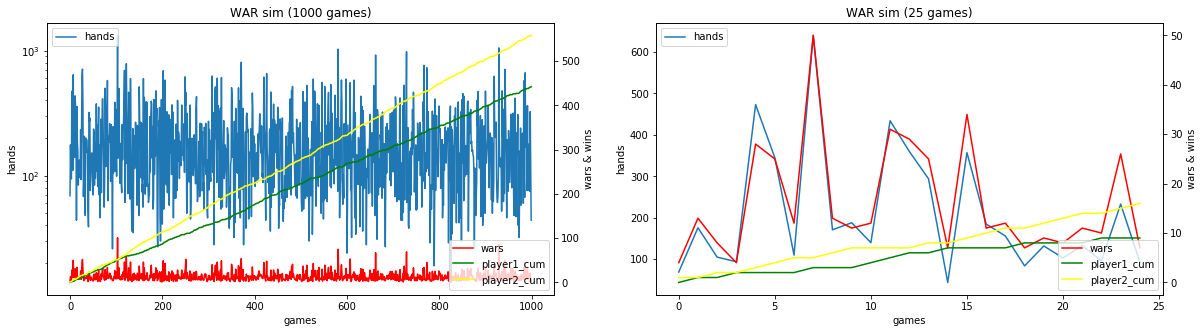

In [28]:
# optionally graph the results

data = pd.read_csv('war_sim.csv')
data['player1_cum'] = data['player1'].cumsum()
data['player2_cum'] = data['player2'].cumsum()
data.index.name = 'games'

print(data.head(25))

fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(121)
ax1.set_ylabel('hands')
ax1.set_yscale('log')
ax12 = ax1.twinx()
ax12.set_ylabel('wars & wins')

data.plot(kind='line',use_index=True,y='hands', ax=ax1, title='WAR sim ({} games)'.format(data.shape[0]))
data.plot(kind='line',use_index=True,y='wars', color='red', ax=ax12)
data.plot(kind='line',use_index=True,y='player1_cum', color='green', ax=ax12)
data.plot(kind='line',use_index=True,y='player2_cum', color='yellow', ax=ax12)
ax1.legend(loc='upper left')
ax12.legend(loc='lower right')

# less data plot
ax2 = fig.add_subplot(122)
ax2.set_ylabel('hands')
ax22 = ax2.twinx()
ax22.set_ylabel('wars & wins')

# only plot first 25 games
data2 = data.head(25)

data2.plot(kind='line',use_index=True,y='hands', ax=ax2, title='WAR sim ({} games)'.format(data2.shape[0]))
data2.plot(kind='line',use_index=True,y='wars', color='red', ax=ax22)
data2.plot(kind='line',use_index=True,y='player1_cum', color='green', ax=ax22)
data2.plot(kind='line',use_index=True,y='player2_cum', color='yellow', ax=ax22)
ax2.legend(loc='upper left')
ax22.legend(loc='lower right')

plt.show();
fig.savefig('war-plots.jpg', dpi=fig.dpi)